<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore</a></span><ul class="toc-item"><li><span><a href="#Samples-per-MAG" data-toc-modified-id="Samples-per-MAG-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Samples per MAG</a></span></li></ul></li><li><span><a href="#top-100-samples" data-toc-modified-id="top-100-samples-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>top 100 samples</a></span><ul class="toc-item"><li><span><a href="#Getting-run-accessions" data-toc-modified-id="Getting-run-accessions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Getting run accessions</a></span></li><li><span><a href="#Downloading-genomes" data-toc-modified-id="Downloading-genomes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Downloading genomes</a></span></li><li><span><a href="#LLMGQC-for-metagenomes" data-toc-modified-id="LLMGQC-for-metagenomes-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>LLMGQC for metagenomes</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Creating-formatted-genome-<=>-sample-table" data-toc-modified-id="Creating-formatted-genome-<=>-sample-table-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Creating formatted genome &lt;=&gt; sample table</a></span></li></ul></li><li><span><a href="#DeepMAsED-SM" data-toc-modified-id="DeepMAsED-SM-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>DeepMAsED-SM</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#DL-model-evaluation" data-toc-modified-id="DL-model-evaluation-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>DL model evaluation</a></span><ul class="toc-item"><li><span><a href="#Summarize-by-study" data-toc-modified-id="Summarize-by-study-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Summarize by study</a></span></li><li><span><a href="#Summarize-by-genome" data-toc-modified-id="Summarize-by-genome-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Summarize by genome</a></span></li><li><span><a href="#Summarize-by-contig" data-toc-modified-id="Summarize-by-contig-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Summarize by contig</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Select genomes (& associated metagenomes) to evalulate with DeepMAsED v2

# Var

In [6]:
work_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/'

# UHGG metadata
uhgg_meta_file = '/ebio/abt3_projects/databases_no-backup/UHGG/2019_09/genomes_metadata.tsv'

# params
threads = 4

# Init

In [7]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [8]:
setDTthreads(threads)
df.dims()

# Load

In [4]:
uhgg_meta = Fread(uhgg_meta_file)
uhgg_meta

Created directory: /ebio/abt3_scratch/nyoungblut/R_tmp 


Genome           Original_name                        Study_set
1      GUT_GENOME000001 11861_6_55                           HBC      
2      GUT_GENOME000002 11861_6_56                           HBC      
⋮      ⋮                ⋮                                    ⋮        
286996 GUT_GENOME286996 ZellerG_2014__MMPU99077057ST__bin.71 CIBIO    
286997 GUT_GENOME286997 ZellerG_2014__MMPU99077057ST__bin.72 CIBIO    
       Genome_type Length  N_contigs N50   GC_content Completeness
1      Isolate     3221441 137       47272 28.26      98.59       
2      Isolate     3296933  82       96092 38.19      99.33       
⋮      ⋮           ⋮       ⋮         ⋮     ⋮          ⋮           
286996 MAG         2155871  51       58794 58.54      94.46       
286997 MAG         2883579 383       10509 43.57      94.53       
       Contamination ⋯ tRNAs Genome_accession Species_rep      MGnify_accession
1      0.70          ⋯ 20    NA               GUT_GENOME000001 MGYG-HGUT-00001 
2      1.34          ⋯ 20    NA               GUT_GENOME001689 MGYG-HGUT-00262 
⋮      ⋮             ⋱ ⋮     ⋮                ⋮                ⋮               
286996 0.00          ⋯ 18    NA               GUT_GENOME239684 MGYG-HGUT-03686 
286997 0.94          ⋯ 19    NA               GUT_GENOME000682 MGYG-HGUT-00144 
       Lineage                                                                                                                      
1      d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Peptostreptococcaceae;g__GCA-900066495;s__              
2      d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_E;s__Eubacterium_E hallii      
⋮      ⋮                                                                                                                            
286996 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp000765235                   
286997 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Barnesiellaceae;g__Barnesiella;s__Barnesiella intestinihominis
       Sample_accession Study_accession Country        Continent
1      ERS370061        ERP105624       United Kingdom Europe   
2      ERS370062        ERP105624       United Kingdom Europe   
⋮      ⋮                ⋮               ⋮              ⋮        
286996 ERS436838        ERP005534       Germany        Europe   
286997 ERS436838        ERP005534       Germany        Europe   
       FTP_download                                                                                                                                           
1      ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00001/genomes1/GUT_GENOME000001.gff.gz
2      ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-002/MGYG-HGUT-00262/genomes1/GUT_GENOME000002.gff.gz
⋮      ⋮                                                                                                                                                      
286996 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-036/MGYG-HGUT-03686/genomes4/GUT_GENOME286996.gff.gz
286997 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-001/MGYG-HGUT-00144/genomes1/GUT_GENOME286997.gff.gz

# Explore

Exploring the dataset

In [6]:
df.dims(10)
uhgg_meta %>%
    summarize.(n = n.(),
               .by=c(Study_set))
df.dims()

Study_set  n     
1 HBC           734
2 CGR          1519
3 CIBIO      137474
4 EBI         87386
5 HGM         51489
6 NCBI          651
7 PATRIC/IMG   7744

In [7]:
uhgg_meta %>%
    summarize.(n = n.(),
               .by=c(Genome_type))

Genome_type n     
1 Isolate      10648
2 MAG         276349

In [8]:
uhgg_meta %>% .$Completeness %>% summary_x('Completeness')
uhgg_meta %>% .$Contamination %>% summary_x('Contamination')

Min.  1st Qu. Median Mean     3rd Qu. Max. sd     sd_err_of_mean
Completeness 50.03 77.24   90.54  85.69994 96.43   100  18.183 7.423

Min. 1st Qu. Median Mean     3rd Qu. Max. sd    sd_err_of_mean
Contamination 0    0.11    0.85   1.173108 1.79    5    1.846 0.754

In [9]:
# which MAGs have associated sample accession?
uhgg_meta %>%
    filter.(Genome_type == 'MAG') %>%
    mutate.(has_sample = !is.na(Sample_accession)) %>%
    summarize.(n = n.(),
               .by=has_sample)

has_sample n     
1  TRUE      268493
2 FALSE        7856

## Samples per MAG

In [10]:
uhgg_meta_f = uhgg_meta %>% 
    filter.(Genome_type == 'MAG',
            !is.na(Sample_accession)) 
uhgg_meta_f 

Genome           Original_name                        Study_set
1      GUT_GENOME001878 AsnicarF_2017__MV_FEI1_t1Q14__bin.10 CIBIO    
2      GUT_GENOME001879 AsnicarF_2017__MV_FEI1_t1Q14__bin.2  CIBIO    
⋮      ⋮                ⋮                                    ⋮        
268492 GUT_GENOME286996 ZellerG_2014__MMPU99077057ST__bin.71 CIBIO    
268493 GUT_GENOME286997 ZellerG_2014__MMPU99077057ST__bin.72 CIBIO    
       Genome_type Length  N_contigs N50   GC_content Completeness
1      MAG         2026042 403       6562  60.17      84.65       
2      MAG         1868450 616       3134  44.24      64.75       
⋮      ⋮           ⋮       ⋮         ⋮     ⋮          ⋮           
268492 MAG         2155871  51       58794 58.54      94.46       
268493 MAG         2883579 383       10509 43.57      94.53       
       Contamination ⋯ tRNAs Genome_accession Species_rep      MGnify_accession
1      1.65          ⋯ 16    NA               GUT_GENOME095938 MGYG-HGUT-01292 
2      0.88          ⋯  7    NA               GUT_GENOME096210 MGYG-HGUT-01380 
⋮      ⋮             ⋱ ⋮     ⋮                ⋮                ⋮               
268492 0.00          ⋯ 18    NA               GUT_GENOME239684 MGYG-HGUT-03686 
268493 0.94          ⋯ 19    NA               GUT_GENOME000682 MGYG-HGUT-00144 
       Lineage                                                                                                                                  
1      d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium infantis
2      d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Faecalicatena;s__Faecalicatena gnavus                  
⋮      ⋮                                                                                                                                        
268492 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp000765235                               
268493 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Barnesiellaceae;g__Barnesiella;s__Barnesiella intestinihominis            
       Sample_accession Study_accession Country Continent
1      SRS1634634       SRP082656       Italy   Europe   
2      SRS1634634       SRP082656       Italy   Europe   
⋮      ⋮                ⋮               ⋮       ⋮        
268492 ERS436838        ERP005534       Germany Europe   
268493 ERS436838        ERP005534       Germany Europe   
       FTP_download                                                                                                                                           
1      ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-012/MGYG-HGUT-01292/genomes3/GUT_GENOME001878.gff.gz
2      ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-013/MGYG-HGUT-01380/genomes2/GUT_GENOME001879.gff.gz
⋮      ⋮                                                                                                                                                      
268492 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-036/MGYG-HGUT-03686/genomes4/GUT_GENOME286996.gff.gz
268493 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-001/MGYG-HGUT-00144/genomes1/GUT_GENOME286997.gff.gz

In [11]:
# MAGs per sample
uhgg_meta_f %>%
    summarize.(n = n.(),
               .by=c(Sample_accession)) %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   17.00   23.06   31.00 6076.00 

# top 100 samples

* metagenome samples with the most MAGs assigned to them

In [240]:
# top 100
uhgg_meta_ff = uhgg_meta_f %>%
    summarize.(n = n.(),
               .by=c(Sample_accession)) %>%
    arrange.(-n) %>%
    slice_head.(n=100) 
cat('No. of MAGs:', uhgg_meta_ff$n %>% sum, '\n')

No. of MAGs: 16971 


## Getting run accessions

In [241]:
# via ENA REST API
get_ENA_info = function(sample_accession){
    cmd = paste0('wget -qO- \'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=',
                 sample_accession, '&result=read_run\'')
    ret = bash_job(cmd, return_output=TRUE, print_output=FALSE)
    ret = read.csv(text=ret, sep='\t')
    ret$Sample_accession = sample_accession
    return(ret)
}
df = get_ENA_info('ERS1444621')
df

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS1444621&result=read_run'"



run_accession
1 ERR1727756   
2 ERR1727757   
⋮ ⋮            
7 ERR1728880   
8 ERR1728881   
  fastq_ftp                                                                                                                                        
1 ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/006/ERR1727756/ERR1727756_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/006/ERR1727756/ERR1727756_2.fastq.gz
2 ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/007/ERR1727757/ERR1727757_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/007/ERR1727757/ERR1727757_2.fastq.gz
⋮ ⋮                                                                                                                                                
7 ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/000/ERR1728880/ERR1728880.fastq.gz                                                                           
8 ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/001/ERR1728881/ERR1728881.fastq.gz                                                                           
  fastq_bytes        
1 661441404;659997128
2 621189240;618922836
⋮ ⋮                  
7 82093036           
8 87880314           
  fastq_md5                                                        
1 eb62183690330fc99ce7dee618646fa5;60e1791e2d3cc1cbdbd56a78edf71eff
2 b6614ba5a9029f20ce9f487d30d2b4ab;6c6db3c06ec93df31e5cca541622e1da
⋮ ⋮                                                                
7 2a3f10852bd3ea1166cae92f830167a4                                 
8 9c7ae3c7941005dd46d9deab522a2ead                                 
  submitted_ftp                                                                                                                                                                                                                                          
1 ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1727756/713B069-11-0-0_14s007604-1-1_lane5.screened.adapter.screened.hg19.pair.1.fq.gz;ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1727756/713B069-11-0-0_14s007604-1-1_lane5.screened.adapter.screened.hg19.pair.2.fq.gz
2 ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1727757/713B069-11-0-0_14s007604-4-1_lane8.screened.adapter.screened.hg19.pair.1.fq.gz;ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1727757/713B069-11-0-0_14s007604-4-1_lane8.screened.adapter.screened.hg19.pair.2.fq.gz
⋮ ⋮                                                                                                                                                                                                                                                      
7 ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1728880/713B069-11-0-0_14s007604-4-1_lane8.screened.adapter.screened.hg19.single.fq.gz                                                                                                                            
8 ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1728881/713B069-11-0-0_14s007604-1-1_lane5.screened.adapter.screened.hg19.single.fq.gz                                                                                                                            
  submitted_bytes    
1 615362637;614138393
2 577856647;575761646
⋮ ⋮                  
7 77251804           
8 82694653           
  submitted_md5                                                     sra_ftp
1 811db7be9cef02c4bf549da4ab88337c;59a2654877884b65d4e59f3d74a1513e NA     
2 7f0a00e47f2dc27b4f9ed5adfa54164d;e40c98c1f2f227362619cc7c9fa21189 NA     
⋮ ⋮                                                                 ⋮      
7 54af0bd70cdfe420c363717cf85c6f84                                  NA     
8 5289d8ea19d5e1d00c197cf2e7d82e69                                  NA     
  sra_bytes sra_md5 Sample_accession
1 NA        NA      ERS1444621      
2 NA        NA      ERS1444621      
⋮ ⋮         ⋮       ⋮               
7 NA        NA      ERS1444621      
8 NA        NA      ERS1444621

In [242]:
# getting accession info
## WARNING: SLOW!
acc = uhgg_meta_ff %>%
    distinct.(Sample_accession) %>%
    .$Sample_accession %>%
    lapply(get_ENA_info) %>%
    do.call(rbind, .) %>%
    distinct.(run_accession, Sample_accession, fastq_ftp)
acc

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS1996016&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS1117397&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS575987&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS1117537&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS396398&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS576009&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS328727&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS1596800&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS396410&result=read_run'

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS475987&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS1069649&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS576120&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS396384&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS608589&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS396508&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS473139&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=ERS473327&result=read_run'"

bash -c " wget -qO- 'http://www.ebi.ac.uk/ena/data/warehouse/filereport?accession=SRS476076&result=read_run'"



run_accession Sample_accession
1    SRR5557999    SRS1996016      
2    SRR5558000    SRS1996016      
⋮    ⋮             ⋮               
1552 SRR2231375    SRS476155       
1553 SRR2231803    SRS476155       
     fastq_ftp                                                                                                                                        
1    ftp.sra.ebi.ac.uk/vol1/fastq/SRR555/009/SRR5557999/SRR5557999_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/SRR555/009/SRR5557999/SRR5557999_2.fastq.gz
2    ftp.sra.ebi.ac.uk/vol1/fastq/SRR555/000/SRR5558000/SRR5558000_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/SRR555/000/SRR5558000/SRR5558000_2.fastq.gz
⋮    ⋮                                                                                                                                                
1552 ftp.sra.ebi.ac.uk/vol1/fastq/SRR223/005/SRR2231375/SRR2231375_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/SRR223/005/SRR2231375/SRR2231375_2.fastq.gz
1553 ftp.sra.ebi.ac.uk/vol1/fastq/SRR223/003/SRR2231803/SRR2231803_1.fastq.gz;ftp.sra.ebi.ac.uk/vol1/fastq/SRR223/003/SRR2231803/SRR2231803_2.fastq.gz

In [243]:
# how many have paired-end reads?
acc = acc %>%
    mutate.(n_read_files = stringr::str_count(fastq_ftp, ';') + 1) 
acc$n_read_files %>% table

.
   1    2 
  74 1479 

In [244]:
# adding run accession info
## filtering samples lacking read1-read2
uhgg_meta_fj = uhgg_meta_f %>%
    distinct.(Genome, FTP_download, Sample_accession) %>%
    inner_join.(acc %>% filter(n_read_files == 2) %>% select.(-fastq_ftp),
                c('Sample_accession'))
uhgg_meta_fj 

Genome          
1       GUT_GENOME200916
2       GUT_GENOME200917
⋮       ⋮               
5342477 GUT_GENOME236338
5342478 GUT_GENOME236339
        FTP_download                                                                                                                                           
1       ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-045/MGYG-HGUT-04544/genomes1/GUT_GENOME200916.gff.gz
2       ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-038/MGYG-HGUT-03891/genomes3/GUT_GENOME200917.gff.gz
⋮       ⋮                                                                                                                                                      
5342477 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-042/MGYG-HGUT-04207/genomes1/GUT_GENOME236338.gff.gz
5342478 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-006/MGYG-HGUT-00631/genomes1/GUT_GENOME236339.gff.gz
        Sample_accession run_accession n_read_files
1       SRS1996016       SRR5557999    2           
2       SRS1996016       SRR5557999    2           
⋮       ⋮                ⋮             ⋮           
5342477 SRS476155        SRR2231803    2           
5342478 SRS476155        SRR2231803    2

## Downloading genomes

In [245]:
#' wget -O {outfile} {url}
wget_genome = function(df, outdir){
    genome = df$Genome[1]
    url = df$FTP_download[1]
    # download gff
    gff_file = file.path(outdir, paste0(genome, '.gff.gz'))
    cmd = paste('wget', '-O', gff_file, url, sep=' ')
    message(cmd)
    ret = bash_job(cmd, print_output = FALSE)
    # convert to fasta
    exe = '/ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py'
    cmd = paste(exe, '--gzip', gff_file, sep=' ')
    message(cmd)
    ret = bash_job(cmd, print_output = FALSE)
    fasta_file = file.path(outdir, paste0(genome, '.fna.gz'))
    # removing gff
    file.remove(gff_file)
    # return
    return(data.frame(Genome = genome, Fasta = fasta_file))
}

In [246]:
# downloading
outdir = file.path(work_dir, 'LLMGQC_top100', 'genomes')
make_dir(outdir)
ret = uhgg_meta_fj %>%
    distinct.(Genome, FTP_download) %>%
    group_split.(Genome) %>%
    lapply(wget_genome, outdir=outdir) %>%
    do.call(rbind, .)
ret

Created directory: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes 


wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-045/MGYG-HGUT-04544/genomes1/GUT_GENOME200916.gff.gz

bash -c " wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-045/MGYG-HGUT-04544/genomes1/GUT_GENOME200916.gff.gz"

/ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916.gff.gz

bash -c " /ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916

bash -c " wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200924.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-013/MGYG-HGUT-01319/genomes1/GUT_GENOME200924.gff.gz"

/ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200924.gff.gz

bash -c " /ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200924.gff.gz"

wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200925.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-013/MGYG-HGUT-01306/genomes1/GUT_GENOME20092

/ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200932.gff.gz

bash -c " /ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py --gzip /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200932.gff.gz"

wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200933.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-023/MGYG-HGUT-02395/genomes1/GUT_GENOME200933.gff.gz

bash -c " wget -O /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200933.gff.gz ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-023/MGYG-HGUT-02395/genomes1/GUT_GENOME200933

limit_output extension: Maximum message size of 20000 exceeded with 20104 characters

In [247]:
# adding info to table
overlap(uhgg_meta_fj$Genome, ret$Genome)
uhgg_meta_fj = uhgg_meta_fj %>%
    inner_join.(ret, c('Genome'))
uhgg_meta_fj 

intersect(x,y): 16971 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 16971 


Genome          
1       GUT_GENOME200916
2       GUT_GENOME200916
⋮       ⋮               
5342477 GUT_GENOME236339
5342478 GUT_GENOME236339
        FTP_download                                                                                                                                           
1       ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-045/MGYG-HGUT-04544/genomes1/GUT_GENOME200916.gff.gz
2       ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-045/MGYG-HGUT-04544/genomes1/GUT_GENOME200916.gff.gz
⋮       ⋮                                                                                                                                                      
5342477 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-006/MGYG-HGUT-00631/genomes1/GUT_GENOME236339.gff.gz
5342478 ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-006/MGYG-HGUT-00631/genomes1/GUT_GENOME236339.gff.gz
        Sample_accession run_accession n_read_files
1       SRS1996016       SRR5557999    2           
2       SRS1996016       SRR5558000    2           
⋮       ⋮                ⋮             ⋮           
5342477 SRS476155        SRR2231375    2           
5342478 SRS476155        SRR2231803    2           
        Fasta                                                                                                                        
1       /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916.fna.gz
2       /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME200916.fna.gz
⋮       ⋮                                                                                                                            
5342477 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME236339.fna.gz
5342478 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genomes/GUT_GENOME236339.fna.gz

## LLMGQC for metagenomes

* Download & QC for all associated metagenomes

In [248]:
# formatting
samps = uhgg_meta_fj %>%
    distinct.(Sample_accession, run_accession) %>%
    mutate.(Run = 1) %>%
    mutate.(Lane = 1:length(run_accession),
            .by=c(Sample_accession)) %>%
    rename.('Sample' = Sample_accession,
            'Remote' = run_accession)
samps %>% unique_n('sample accessions', Sample)
samps %>% unique_n('run accessions', Remote)
samps$Lane %>% summary_x('No. of lanes')
samps

No. of unique sample accessions: 100 
No. of unique run accessions: 1479 


Min. 1st Qu. Median Mean     3rd Qu. Max. sd      sd_err_of_mean
No. of lanes 1    8       129    258.0899 498.5   868  336.884 137.532

Sample     Remote     Run Lane
1    SRS1996016 SRR5557999 1   1   
2    SRS1996016 SRR5558000 1   2   
⋮    ⋮          ⋮          ⋮   ⋮   
1478 SRS476155  SRR2231375 1   18  
1479 SRS476155  SRR2231803 1   19

In [249]:
F = file.path(work_dir, 'LLMGQC_top100', 'samples.tsv')
samps %>% write_table(F)

File written: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/samples.tsv 


### Config

In [251]:
F = file.path(work_dir, 'LLMGQC_top100', 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/samples.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

# ionice for reducing I/O load (use "-c 2" for noraml I/O usage) 
ionice: -c 3 

#-- Software parameters --#
# Use "Skip" to skip any of these steps. If no params for rule, use ""
# `clumpify`: change dupedist if not HiSeq3000/4000 (dupedist=40 for NextSeq, HiSeq2500, and MiSeq)
# `clumpify` (more info): this will likely fail for remote (SRA) samples
# `use_prefetch`: If True, uses aspera connect prefetch (potentially faster download)
# `remote`: If True, just download read1 (if remote fil

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/databases_no-backup/DeepMAsED/bin/llmgqc
$ screen -L -S llmgqc-UHGG ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/config.yaml 30 --scheduler greedy -F
```

### Summary

In [271]:
F = file.path(work_dir, 'LLMGQC_top100', 'reports', 'multiqc-final', 
          'multiqc_data', 'multiqc_fastqc.txt')
fastqc = Fread(F) %>%
    mutate.(Sample = gsub(' \\|.+', '', Sample),
            Read = gsub('_.+', '', Filename),
            min_seq_len = gsub('-.+', '', Sequence.length) %>% as.numeric,
            max_seq_len = gsub('.+-', '', Sequence.length) %>% as.numeric) %>%
    filter.(Read == 'R1') %>%
    select.(-Encoding, -Sequences.flagged.as.poor.quality) 
fastqc

Sample     Filename       File.type               Total.Sequences
1  ERS1066669 R1_final.fq.gz Conventional base calls 24335706       
2  ERS1066672 R1_final.fq.gz Conventional base calls 25548305       
⋮  ⋮          ⋮              ⋮                       ⋮              
97 SRS585059  R1_final.fq.gz Conventional base calls 66081130       
98 SRS585113  R1_final.fq.gz Conventional base calls 33415494       
   Sequence.length X.GC total_deduplicated_percentage avg_sequence_length
1  80-90           45   92.02743                      89.53843           
2  80-89           46   91.94924                      88.59878           
⋮  ⋮               ⋮    ⋮                             ⋮                  
97 80-175          47   75.67847                      98.36608           
98 80-175          43   78.06534                      98.60794           
   basic_statistics per_base_sequence_quality ⋯ per_base_sequence_content
1  pass             pass                      ⋯ pass                     
2  pass             pass                      ⋯ pass                     
⋮  ⋮                ⋮                         ⋱ ⋮                        
97 pass             pass                      ⋯ fail                     
98 pass             pass                      ⋯ fail                     
   per_sequence_gc_content per_base_n_content sequence_length_distribution
1  pass                    pass               warn                        
2  pass                    pass               warn                        
⋮  ⋮                       ⋮                  ⋮                           
97 warn                    pass               warn                        
98 pass                    pass               warn                        
   sequence_duplication_levels overrepresented_sequences adapter_content Read
1  pass                        pass                      pass            R1  
2  pass                        pass                      pass            R1  
⋮  ⋮                           ⋮                         ⋮               ⋮   
97 pass                        pass                      pass            R1  
98 pass                        pass                      pass            R1  
   min_seq_len max_seq_len
1  80          90         
2  80          89         
⋮  ⋮           ⋮          
97 80          175        
98 80          175

In [276]:
fastqc$Total.Sequences %>% summary_x('total seqs')
fastqc$min_seq_len %>% summary_x('min seq length')
fastqc$max_seq_len %>% summary_x('max seq length')
fastqc$total_deduplicated_percentage %>% summary_x('total % dups')

Min.     1st Qu.  Median   Mean      3rd Qu.  Max.       sd        
total seqs 16716957 23728788 32250622 105885823 50750414 4909511689 1985834246
           sd_err_of_mean
total seqs 810713436

Min. 1st Qu. Median Mean 3rd Qu. Max. sd sd_err_of_mean
min seq length 80   80      80     80   80      80   0  0

Min. 1st Qu. Median Mean     3rd Qu. Max. sd     sd_err_of_mean
max seq length 85   87.5    100    114.7755 150     175  36.397 14.859

Min.     1st Qu.  Median   Mean     3rd Qu.  Max.     sd    
total % dups 5.993931 81.06742 89.68595 82.93031 91.96356 95.54726 34.017
             sd_err_of_mean
total % dups 13.887

### Creating formatted genome <=> sample table

In [277]:
F = file.path(work_dir, 'LLMGQC_top100', 'final', 'samples.txt')
postqc_samps = Fread(F)
postqc_samps

Warning message in data.table::fread(infile, sep = sep, check.names = check.names, :
“Detected 4 column names but the data has 3 columns. Filling rows automatically. Set fill=TRUE explicitly to avoid this warning.”


Sample    
1   SRS1996016
2   SRS1117397
⋮   ⋮         
99  ERS473238 
100 SRS476155 
    Read1                                                                                                                       
1   /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R1_final.fq.gz
2   /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1117397/R1_final.fq.gz
⋮   ⋮                                                                                                                           
99  /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/ERS473238/R1_final.fq.gz 
100 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R1_final.fq.gz 
    Read2                                                                                                                       
1   /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R2_final.fq.gz
2   /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1117397/R2_final.fq.gz
⋮   ⋮                                                                                                                           
99  /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/ERS473238/R2_final.fq.gz 
100 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R2_final.fq.gz 
    Notes
1   NA   
2   NA   
⋮   ⋮    
99  NA   
100 NA

In [293]:
# joining
overlap(postqc_samps$Sample, uhgg_meta_fj$Sample_accession)
gen_samp_map = uhgg_meta_fj %>%
    distinct.(Genome, FTP_download, Sample_accession, Fasta) %>%
    inner_join.(postqc_samps, c('Sample_accession'='Sample')) %>%
    select.(Genome, Fasta, Sample_accession, Read1, Read2) %>%
    rename.('Taxon' = Genome,
            'Sample' = Sample_accession) %>%
    mutate.(Fasta = gsub('read_data_eval', 'real_data_eval', Fasta),
            Fasta = gsub('/+', '/', Fasta)) %>%
    distinct.(Taxon, Fasta, Sample, Read1, Read2) %>%
    filter.(!(Read1 == '' |  Read2 == ''))
gen_samp_map

intersect(x,y): 100 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 100 


Taxon           
1     GUT_GENOME200916
2     GUT_GENOME200917
⋮     ⋮               
16728 GUT_GENOME236338
16729 GUT_GENOME236339
      Fasta                                                                                                                       
1     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/genomes/GUT_GENOME200916.fna.gz
2     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/genomes/GUT_GENOME200917.fna.gz
⋮     ⋮                                                                                                                           
16728 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/genomes/GUT_GENOME236338.fna.gz
16729 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/genomes/GUT_GENOME236339.fna.gz
      Sample    
1     SRS1996016
2     SRS1996016
⋮     ⋮         
16728 SRS476155 
16729 SRS476155 
      Read1                                                                                                                       
1     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R1_final.fq.gz
2     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R1_final.fq.gz
⋮     ⋮                                                                                                                           
16728 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R1_final.fq.gz 
16729 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R1_final.fq.gz 
      Read2                                                                                                                       
1     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R2_final.fq.gz
2     /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS1996016/R2_final.fq.gz
⋮     ⋮                                                                                                                           
16728 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R2_final.fq.gz 
16729 /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/final/SRS476155/R2_final.fq.gz

In [294]:
# writing table
F = file.path(work_dir, 'LLMGQC_top100', 'genome-samples.tsv')
write_table(gen_samp_map, F)

File written: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//LLMGQC_top100/genome-samples.tsv 


In [280]:
# # writing table
# ## debug
# F = file.path(work_dir, 'LLMGQC_top100', 'genome-samples.tsv')
# write_table(gen_samp_map %>% sample_n(10), F)

## DeepMAsED-SM

* Evaluating MAG quality

### Config

In [295]:
F = file.path(work_dir, 'LLMGQC_top100', 'DM-sm', 'config.yaml')
cat_file(F)

# Input table
genomes_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/genome-samples.tsv

# Output directory
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/DM-sm/

# Temporary output directory (/dev/shm/ for shared memory)
#tmp_dir: /tmp/
tmp_dir: /ebio/abt3_scratch/

# Email for notifications ("Skip" to skip)
email: nyoungblut@tuebingen.mpg.de

# software parameters
## Use "Skip" to skip  steps. If no params for rule, use ""
## `reps:` is the number of replicate simulations
## If `keep_reads: True`, then simulated reads are kept
params:
  ionice: -c 3
  # simulating metagenomes
  reps: 3
  MGSIM:
    genome_download: ""
    community:
      richness:
        - 0.8
      other_params: --rnd-seed 8712
    reads: --art-paired --art-mflen 250 --art-sdev 10 --rndSeed 8712
    read_depth:
      - 1000000
  keep_reads: True # False
  # coverage
  nonpareil: -T kmer
  nonpareil_summary

### Run

```
screen -L -S ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/DM-sm/config.yaml 40 --scheduler greedy -F
```

## DL model evaluation

* summarize results of DL model 
  * Olga's results: mean accuracy across contigs per genome

In [12]:
# DL model precitions (misasemblies per genome)
model_pred = file.path(work_dir, 'LLMGQC_top100', 'DM-sm', 'DM', 'top100_bestmodel.tsv')
model_pred = Fread(model_pred)
model_pred

sample     genome           misprob
1     ERS473250  GUT_GENOME078408 0      
2     SRS576022  GUT_GENOME165467 0      
⋮     ⋮          ⋮                ⋮      
16683 SRS1417035 GUT_GENOME212133 1      
16684 SRS475968  GUT_GENOME013218 1

### Summarize by study

In [13]:
# checking overlap
overlap(model_pred$genome, uhgg_meta$Genome)

intersect(x,y): 16684 
setdiff(x,y): 0 
setdiff(y,x): 270313 
union(x,y): 286997 


In [14]:
# joining
model_pred = model_pred %>%
    inner_join.(uhgg_meta %>% select.(-FTP_download), 
                c('genome'='Genome')) 
model_pred

sample     genome           misprob
1     ERS473038  GUT_GENOME002207 0.028  
2     ERS473038  GUT_GENOME002208 0.050  
⋮     ⋮          ⋮                ⋮      
16683 ERS1066711 GUT_GENOME247447 0.473  
16684 ERS1066711 GUT_GENOME247448 0.839  
      Original_name                                 Study_set Genome_type
1     BackhedF_2015__SID128_12M__bin.11             CIBIO     MAG        
2     BackhedF_2015__SID128_12M__bin.12             CIBIO     MAG        
⋮     ⋮                                             ⋮         ⋮          
16683 VogtmannE_2016__MMRS93621581ST-27-0-0__bin.95 CIBIO     MAG        
16684 VogtmannE_2016__MMRS93621581ST-27-0-0__bin.98 CIBIO     MAG        
      Length  N_contigs N50   GC_content ⋯ rRNA_23S tRNAs Genome_accession
1     4394415 109       65766 42.18      ⋯ 99.42    20    NA              
2     4081278 119       65196 45.47      ⋯  0.00    19    NA              
⋮     ⋮       ⋮         ⋮     ⋮          ⋱ ⋮        ⋮     ⋮               
16683 1751070  91       26749 53.64      ⋯ 0        18    NA              
16684 1771310 273        9114 59.35      ⋯ 0        11    NA              
      Species_rep      MGnify_accession
1     GUT_GENOME001189 MGYG-HGUT-00203 
2     GUT_GENOME000192 MGYG-HGUT-00044 
⋮     ⋮                ⋮               
16683 GUT_GENOME260844 MGYG-HGUT-04245 
16684 GUT_GENOME239684 MGYG-HGUT-03686 
      Lineage                                                                                                                   
1     d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Butyricimonas;s__Butyricimonas virosa    
2     d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides;s__Parabacteroides merdae
⋮     ⋮                                                                                                                         
16683 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Christensenellales;f__CAG-138;g__;s__                                        
16684 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp000765235                
      Sample_accession Study_accession Country       Continent    
1     ERS473038        ERP005989       Sweden        Europe       
2     ERS473038        ERP005989       Sweden        Europe       
⋮     ⋮                ⋮               ⋮             ⋮            
16683 ERS1066711       ERP013933       United States North America
16684 ERS1066711       ERP013933       United States North America

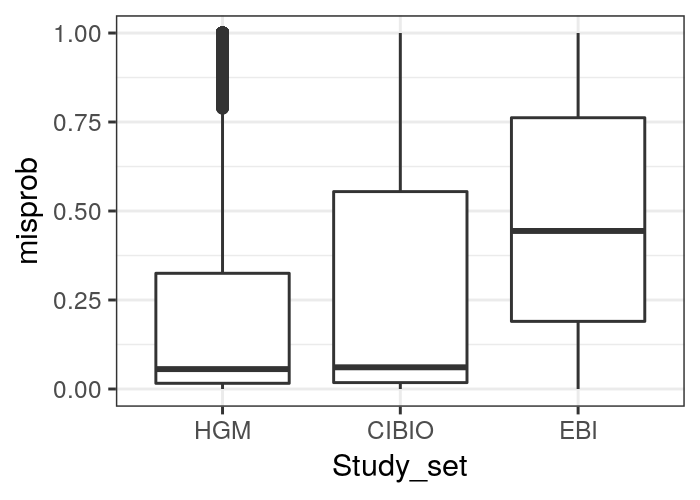

In [15]:
# by study set
p = model_pred %>%
    mutate.(med_misprob = median(misprob),
            .by=c(Study_set)) %>%
    mutate.(Study_set = reorder(Study_set, med_misprob)) %>%
    ggplot(aes(Study_set, misprob)) +
    geom_boxplot() +
    theme_bw()
p.dims(3.5,2.5)
plot(p)

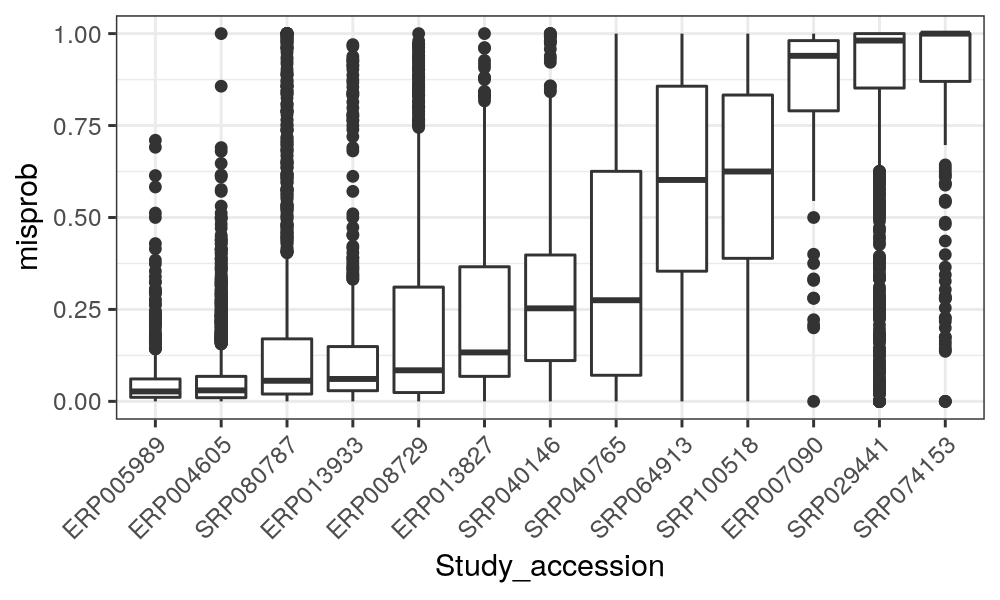

In [16]:
# by study
p = model_pred %>%
    mutate.(med_misprob = median(misprob),
            .by=c(Study_accession)) %>%
    mutate.(Study_accession = reorder(Study_accession, med_misprob)) %>%
    ggplot(aes(Study_accession, misprob)) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(5,3)
plot(p)

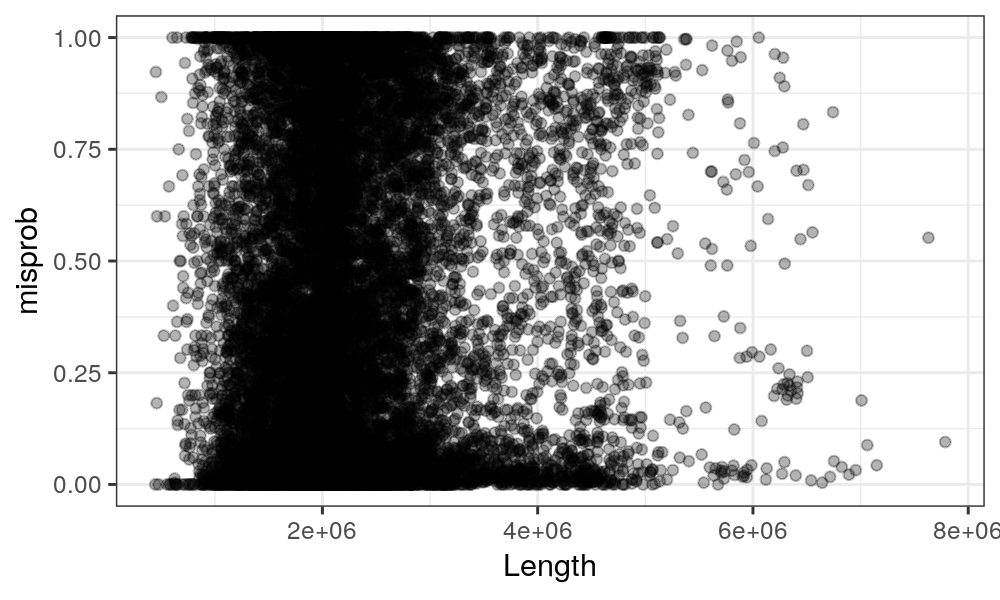

In [17]:
# by genome length
p = model_pred %>%
    ggplot(aes(Length, misprob)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(5,3)
plot(p)

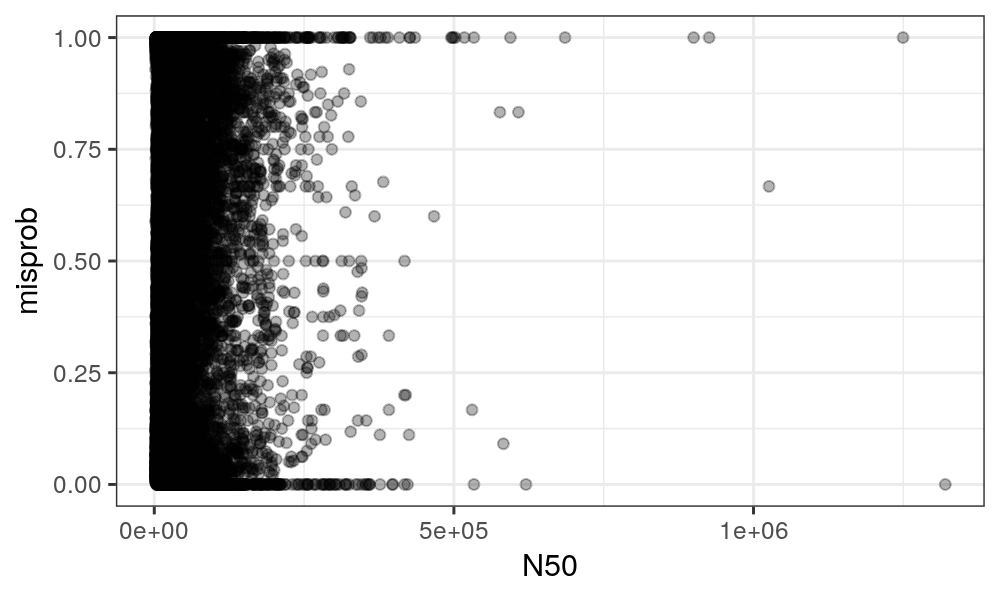

In [18]:
# by genome N50
p = model_pred %>%
    ggplot(aes(N50, misprob)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(5,3)
plot(p)

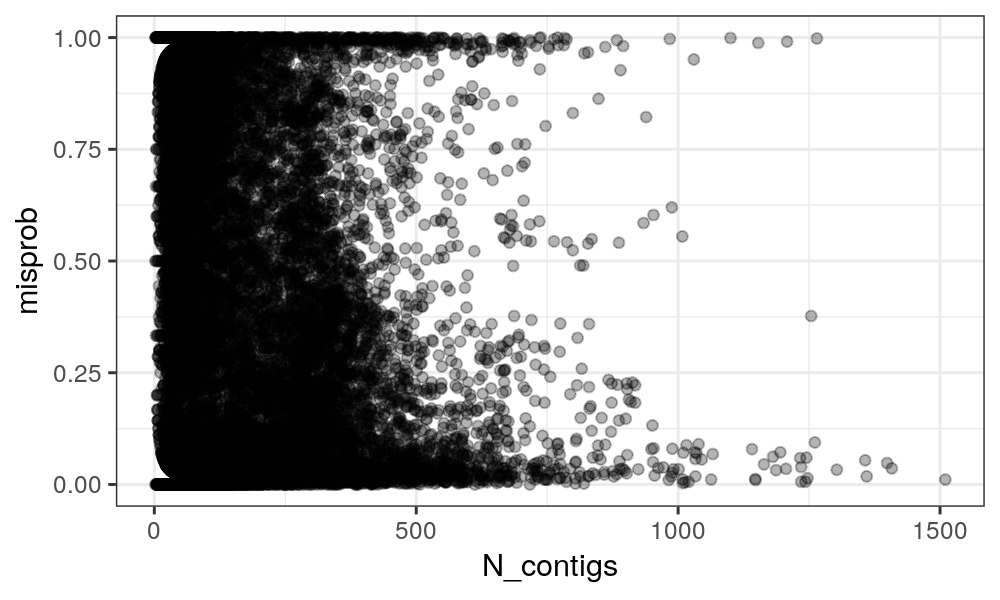

In [19]:
# by genome contigs
p = model_pred %>%
    ggplot(aes(N_contigs, misprob)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(5,3)
plot(p)

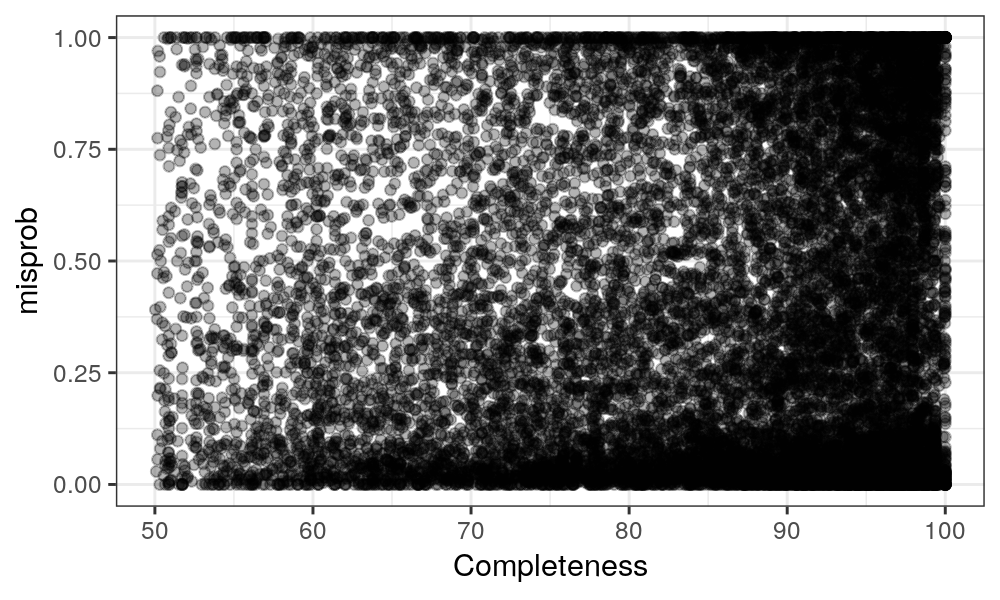

In [20]:
# by genome completeness
p = model_pred %>%
    ggplot(aes(Completeness, misprob)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(5,3)
plot(p)

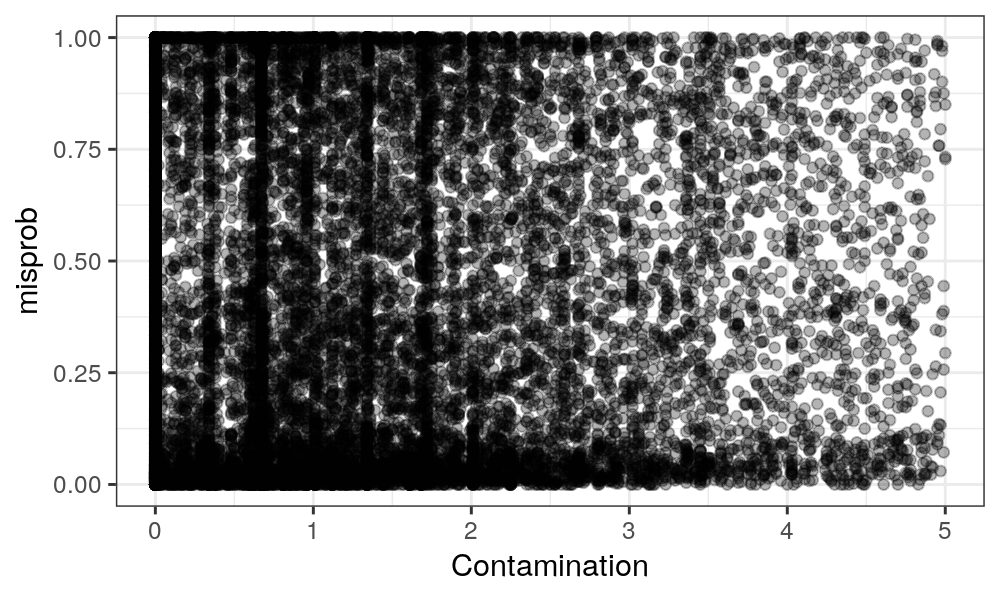

In [21]:
# by genome contamination
p = model_pred %>%
    ggplot(aes(Contamination, misprob)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(5,3)
plot(p)

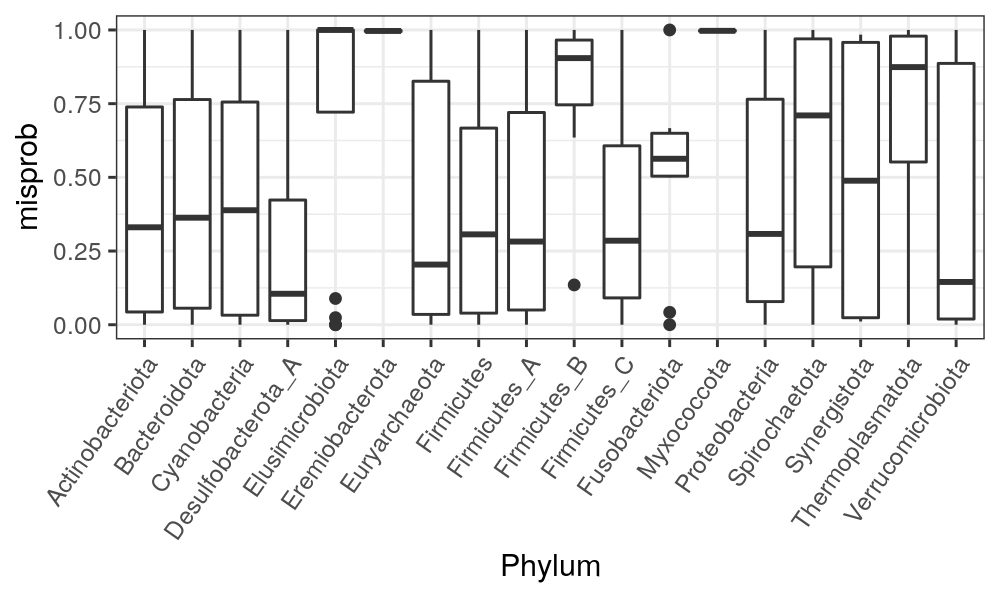

In [22]:
# by phylum
p = model_pred %>%
    separate.(Lineage, taxonomy_levels(), sep=';') %>%
    mutate.(Phylum = gsub('^p__', '', Phylum)) %>%
    ggplot(aes(Phylum, misprob)) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
p.dims(5,3)
plot(p)

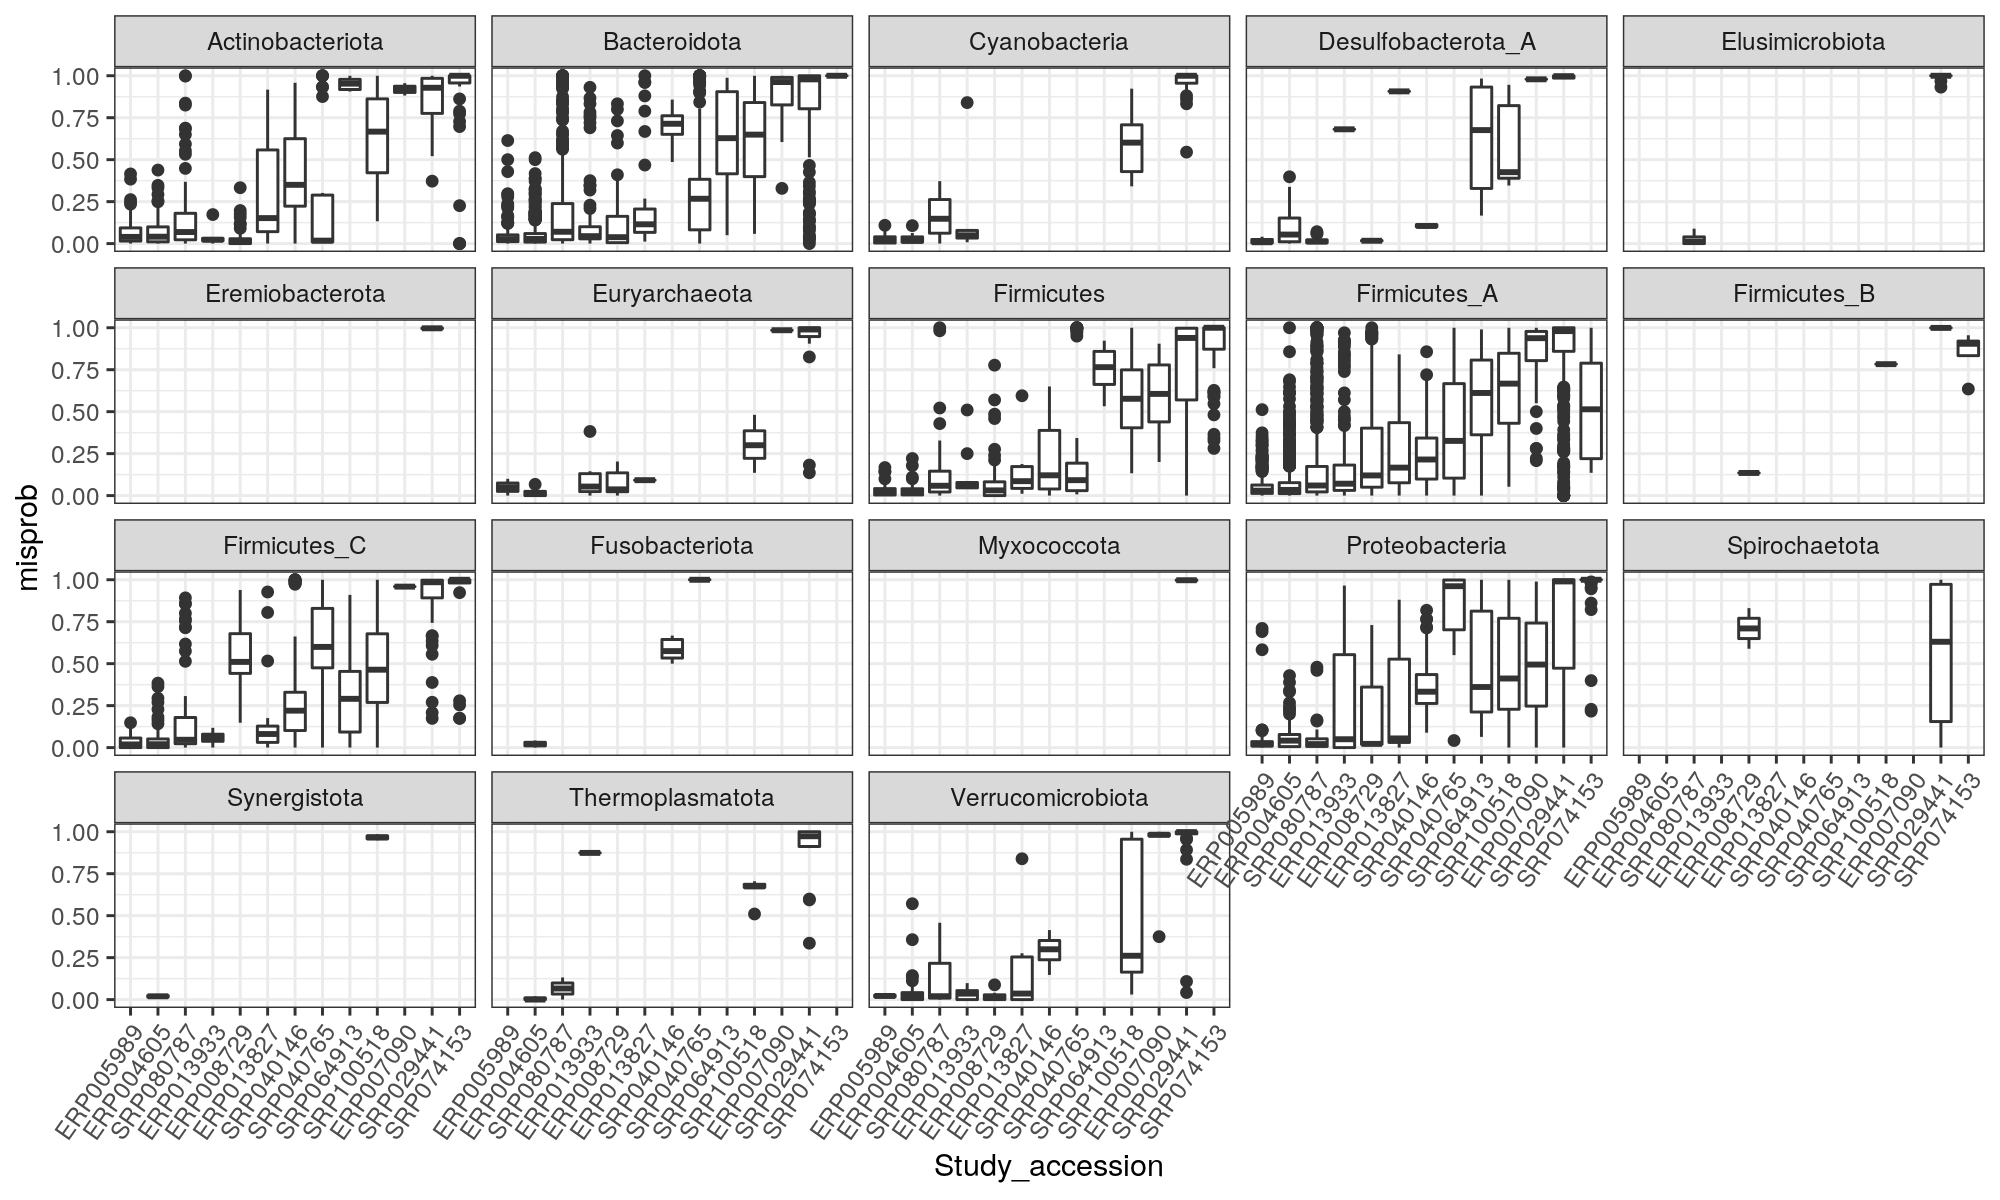

In [23]:
# by phylum & study
p = model_pred %>%
    separate.(Lineage, taxonomy_levels(), sep=';') %>%
    mutate.(Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(med_misprob = median(misprob),
            .by=c(Study_accession)) %>%
    mutate.(Study_accession = reorder(Study_accession, med_misprob)) %>%
    ggplot(aes(Study_accession, misprob)) +
    geom_boxplot() +
    facet_wrap(~ Phylum) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
p.dims(10,6)
plot(p)

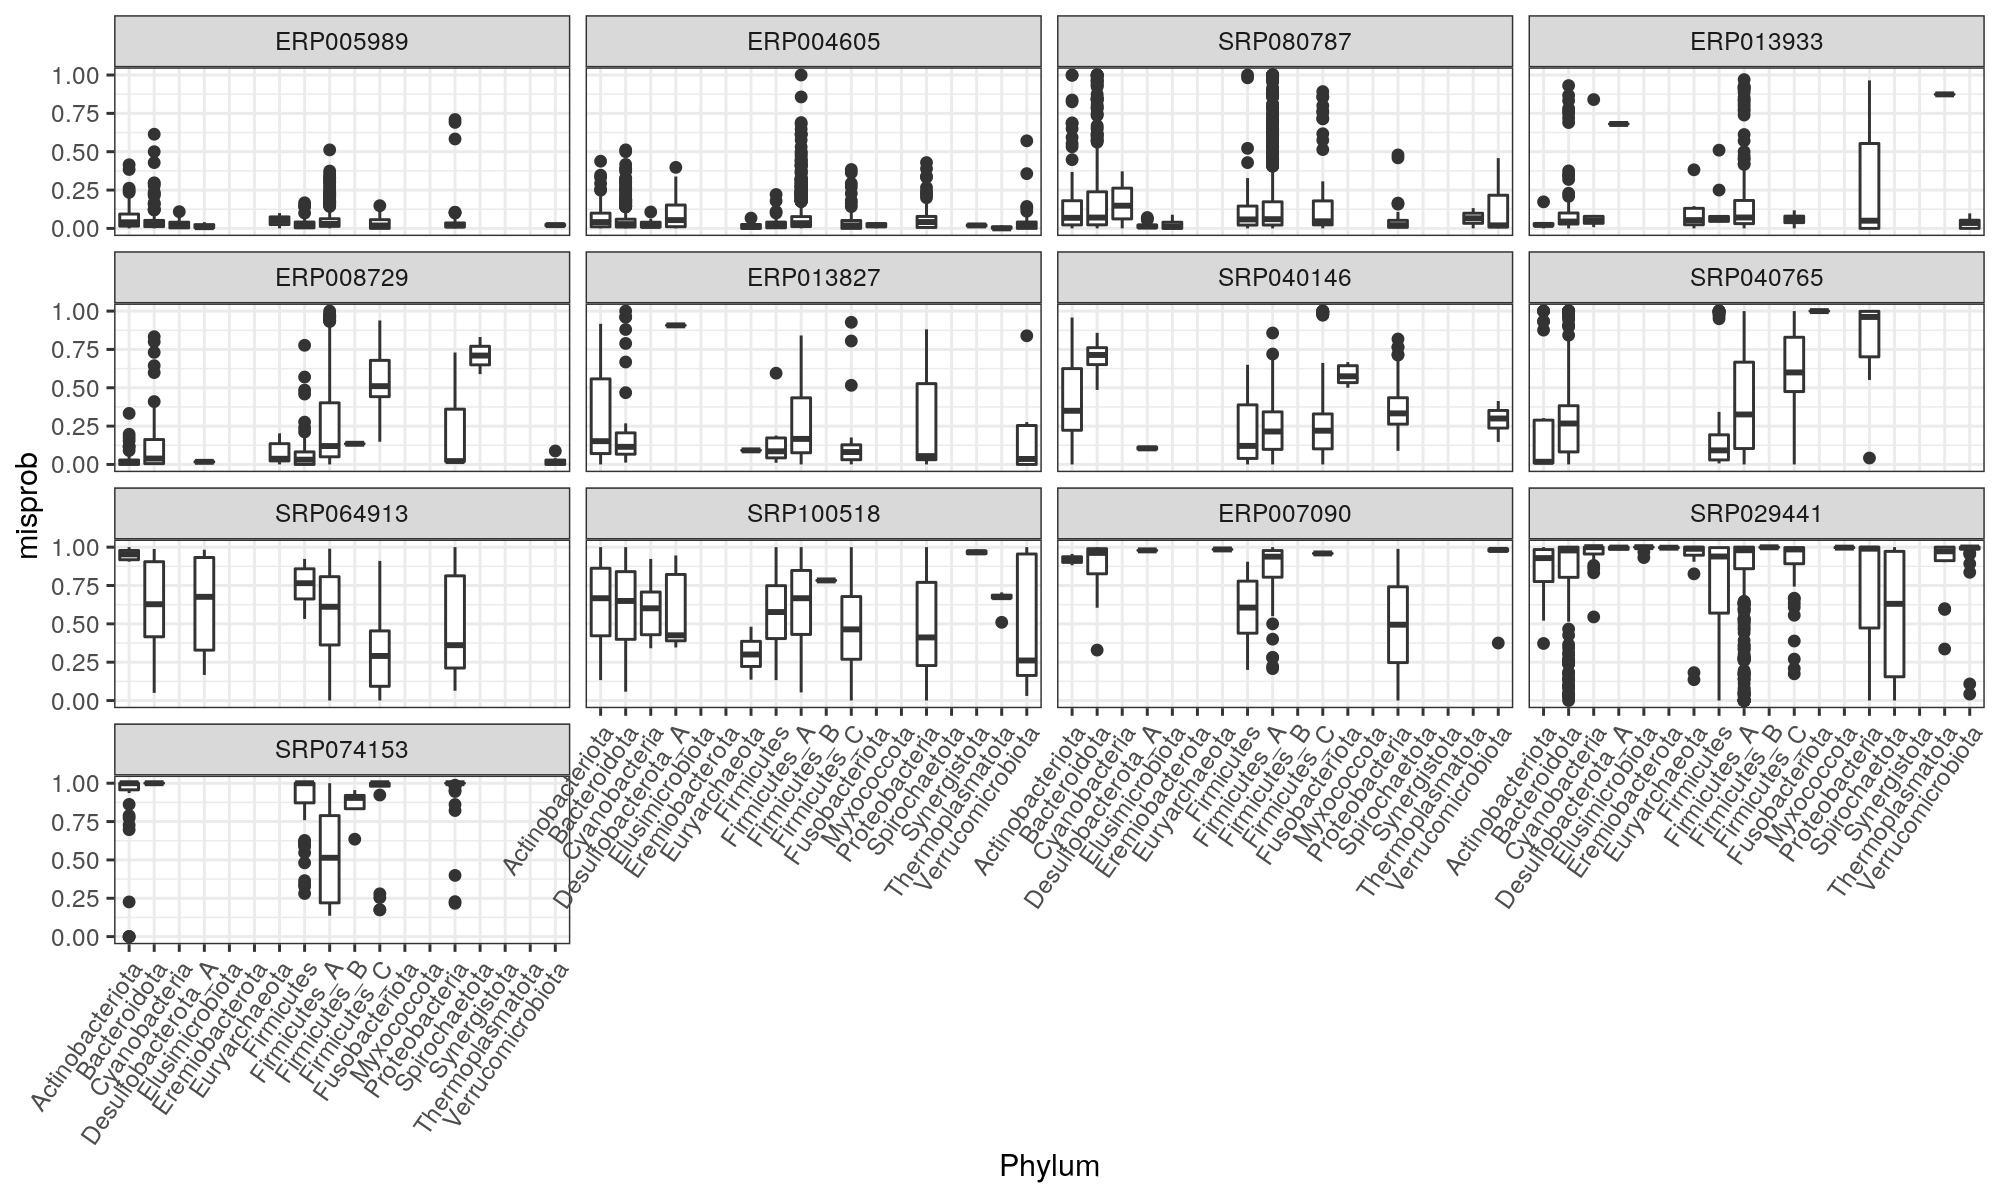

In [24]:
# by phylum & study
p = model_pred %>%
    separate.(Lineage, taxonomy_levels(), sep=';') %>%
    mutate.(Phylum = gsub('^p__', '', Phylum)) %>%
    mutate.(med_misprob = median(misprob),
            .by=c(Study_accession)) %>%
    mutate.(Study_accession = reorder(Study_accession, med_misprob)) %>%
    ggplot(aes(Phylum, misprob)) +
    geom_boxplot() +
    facet_wrap(~ Study_accession) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
p.dims(10,6)
plot(p)

### Summarize by genome

In [25]:
# all feature files
D = file.path(work_dir, 'LLMGQC_top100', 'DM-sm', 'map')
files = list_files(D, 'features.tsv.gz')
files %>% length

[1] 16684

In [26]:
# function to load and summarize feature file 
read_feats = function(F){
    feats = Fread(F) %>%
        summarize.(num_query_A = mean(num_query_A),
                   num_query_C = mean(num_query_C),
                   num_query_T = mean(num_query_T),
                   num_query_G = mean(num_query_G),
                   num_SNPs = mean(num_SNPs),
                   coverage = mean(coverage),
                   num_discordant = mean(num_discordant),
                   seq_window_entropy = mean(seq_window_entropy),
                   seq_window_perc_gc = mean(seq_window_perc_gc),
                   .by=c(assembler))
    feats$sample = F %>% dirname %>% basename
    feats$genome = F %>% dirname %>% dirname %>% basename
    return(feats)
}
## test
feats = read_feats(files[1])
feats

assembler num_query_A num_query_C num_query_T num_query_G num_SNPs   coverage
1 unknown   3.967402    2.910613    3.983739    3.004256    0.02687082 13.86601
  num_discordant seq_window_entropy seq_window_perc_gc sample   
1 0.02308126     1.244431           0.421806           ERS473038
  genome          
1 GUT_GENOME002207

In [33]:
# summarizing features per genome
doParallel::registerDoParallel(12)
feats = files %>%
    #head(n=24) %>%
    plyr::llply(read_feats, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE)
feats

assembler num_query_A num_query_C num_query_T num_query_G num_SNPs  
1     unknown   3.967402    2.910613    3.983739    3.004256    0.02687082
2     unknown   4.963612    4.181731    4.939777    4.051498    0.05952083
⋮     ⋮         ⋮           ⋮           ⋮           ⋮           ⋮         
16683 unknown   4.980339    5.364668    4.797599    5.441215    0.10093245
16684 unknown   1.353335    1.874742    1.371016    1.878061    0.04091401
      coverage  num_discordant seq_window_entropy seq_window_perc_gc sample    
1     13.86601  0.02308126     1.244431           0.4218060          ERS473038 
2     18.13662  0.08444783     1.285709           0.4546408          ERS473038 
⋮     ⋮         ⋮              ⋮                  ⋮                  ⋮         
16683 20.583820 0.21318748     1.283738           0.5364400          ERS1066711
16684  6.477153 0.06888535     1.305178           0.5934401          ERS1066711
      genome          
1     GUT_GENOME002207
2     GUT_GENOME002208
⋮     ⋮               
16683 GUT_GENOME247447
16684 GUT_GENOME247448

In [109]:
# saving: file
F = file.path(work_dir, 'feats_byGenome.RDS')
F

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//feats_byGenome.RDS"

In [35]:
# WARNING: saving: writing
saveRDS(feats, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//feats_byGenome.RDS 


In [110]:
# saving re-loading
feats = readRDS(F)
feats

assembler num_query_A num_query_C num_query_T num_query_G num_SNPs  
1     unknown   3.967402    2.910613    3.983739    3.004256    0.02687082
2     unknown   4.963612    4.181731    4.939777    4.051498    0.05952083
⋮     ⋮         ⋮           ⋮           ⋮           ⋮           ⋮         
16683 unknown   4.980339    5.364668    4.797599    5.441215    0.10093245
16684 unknown   1.353335    1.874742    1.371016    1.878061    0.04091401
      coverage  num_discordant seq_window_entropy seq_window_perc_gc sample    
1     13.86601  0.02308126     1.244431           0.4218060          ERS473038 
2     18.13662  0.08444783     1.285709           0.4546408          ERS473038 
⋮     ⋮         ⋮              ⋮                  ⋮                  ⋮         
16683 20.583820 0.21318748     1.283738           0.5364400          ERS1066711
16684  6.477153 0.06888535     1.305178           0.5934401          ERS1066711
      genome          
1     GUT_GENOME002207
2     GUT_GENOME002208
⋮     ⋮               
16683 GUT_GENOME247447
16684 GUT_GENOME247448

In [111]:
# checking overlap
overlap(model_pred$genome, feats$genome)

intersect(x,y): 16684 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 16684 


In [112]:
# joining
model_pred_j = model_pred %>%
    inner_join.(feats, c('genome'='genome'))
model_pred_j

sample     genome           misprob
1     ERS473038  GUT_GENOME002207 0.028  
2     ERS473038  GUT_GENOME002208 0.050  
⋮     ⋮          ⋮                ⋮      
16683 ERS1066711 GUT_GENOME247447 0.473  
16684 ERS1066711 GUT_GENOME247448 0.839  
      Original_name                                 Study_set Genome_type
1     BackhedF_2015__SID128_12M__bin.11             CIBIO     MAG        
2     BackhedF_2015__SID128_12M__bin.12             CIBIO     MAG        
⋮     ⋮                                             ⋮         ⋮          
16683 VogtmannE_2016__MMRS93621581ST-27-0-0__bin.95 CIBIO     MAG        
16684 VogtmannE_2016__MMRS93621581ST-27-0-0__bin.98 CIBIO     MAG        
      Length  N_contigs N50   GC_content ⋯ num_query_A num_query_C num_query_T
1     4394415 109       65766 42.18      ⋯ 3.967402    2.910613    3.983739   
2     4081278 119       65196 45.47      ⋯ 4.963612    4.181731    4.939777   
⋮     ⋮       ⋮         ⋮     ⋮          ⋱ ⋮           ⋮           ⋮          
16683 1751070  91       26749 53.64      ⋯ 4.980339    5.364668    4.797599   
16684 1771310 273        9114 59.35      ⋯ 1.353335    1.874742    1.371016   
      num_query_G num_SNPs   coverage  num_discordant seq_window_entropy
1     3.004256    0.02687082 13.86601  0.02308126     1.244431          
2     4.051498    0.05952083 18.13662  0.08444783     1.285709          
⋮     ⋮           ⋮          ⋮         ⋮              ⋮                 
16683 5.441215    0.10093245 20.583820 0.21318748     1.283738          
16684 1.878061    0.04091401  6.477153 0.06888535     1.305178          
      seq_window_perc_gc i.sample  
1     0.4218060          ERS473038 
2     0.4546408          ERS473038 
⋮     ⋮                  ⋮         
16683 0.5364400          ERS1066711
16684 0.5934401          ERS1066711

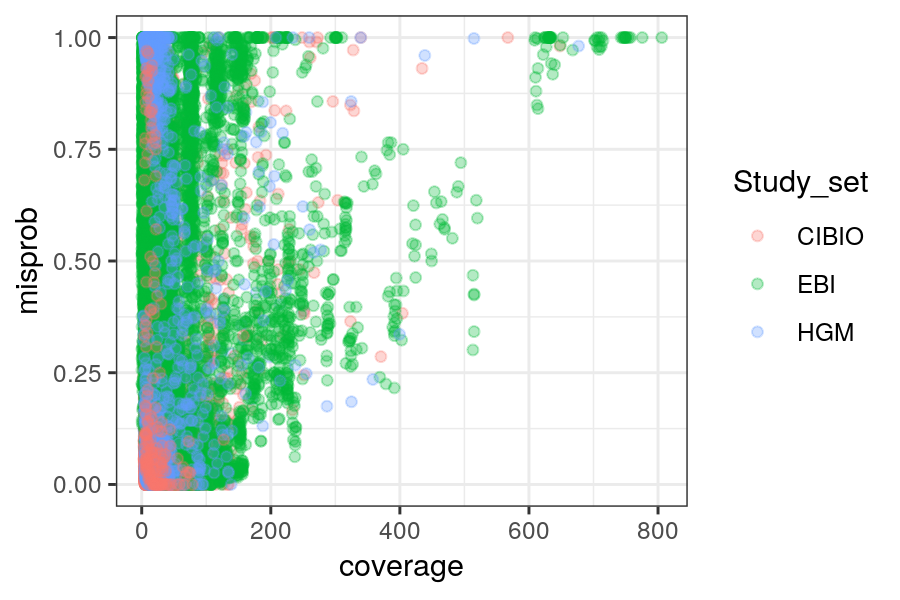

In [113]:
# by coverage
p = model_pred_j %>%
    ggplot(aes(coverage, misprob, color=Study_set)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(4.5,3)
plot(p)

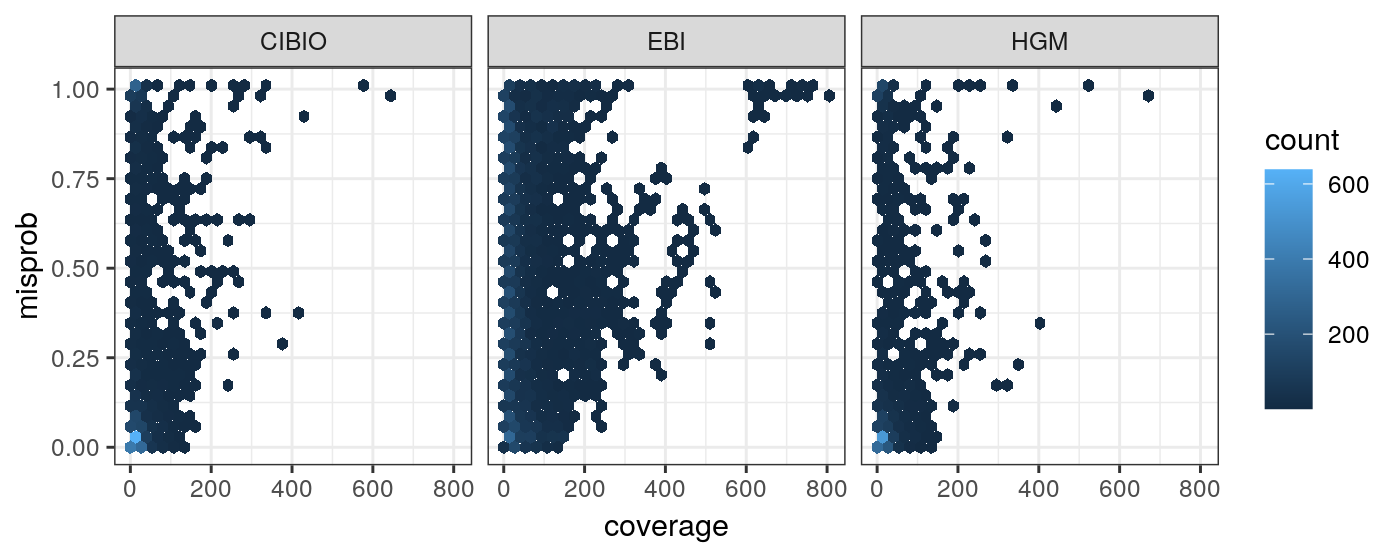

In [116]:
# by coverage
p = model_pred_j %>%
    ggplot(aes(coverage, misprob)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7,2.8)
plot(p)

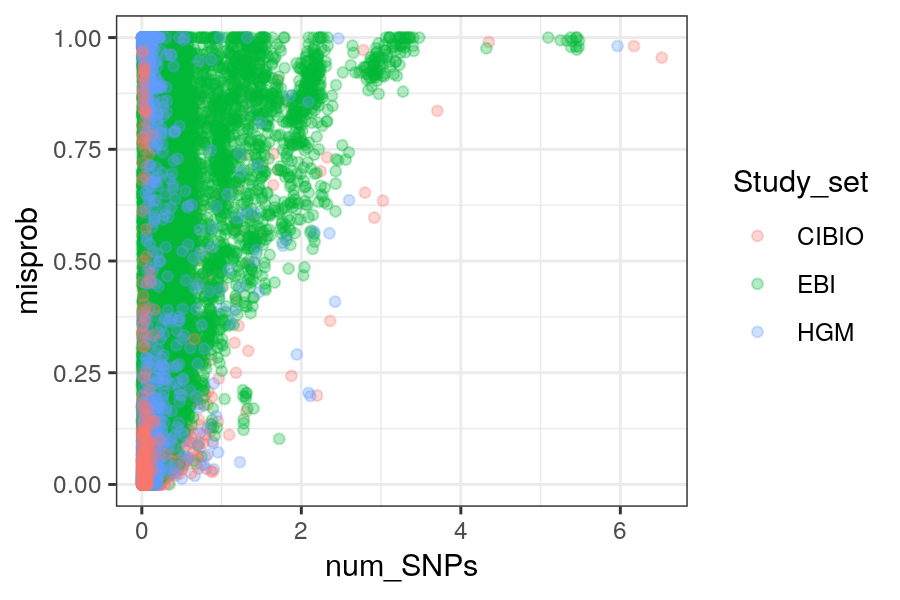

In [42]:
# by num_SNPs
p = model_pred_j %>%
    ggplot(aes(num_SNPs, misprob, color=Study_set)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(4.5,3)
plot(p)

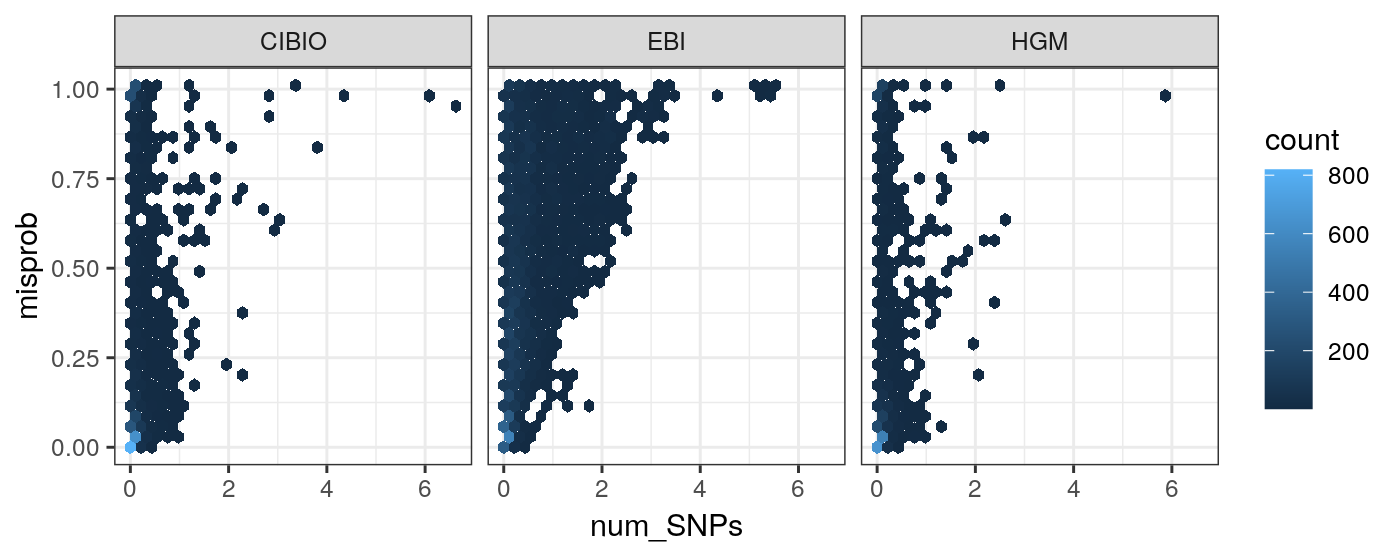

In [118]:
# by SNPs
p = model_pred_j %>%
    ggplot(aes(num_SNPs, misprob)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7,2.8)
plot(p)

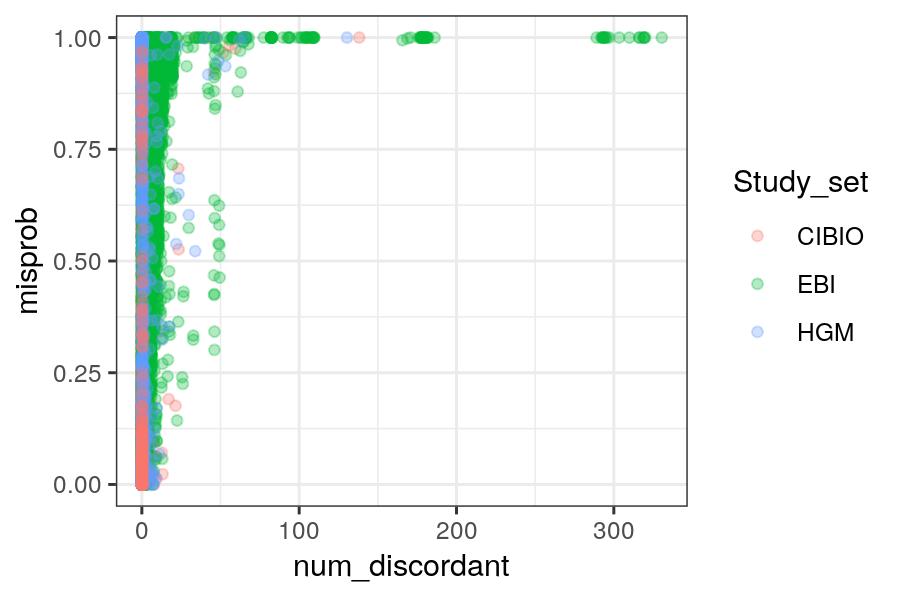

In [44]:
# by num_discordant
p = model_pred_j %>%
    ggplot(aes(num_discordant, misprob, color=Study_set)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(4.5,3)
plot(p)

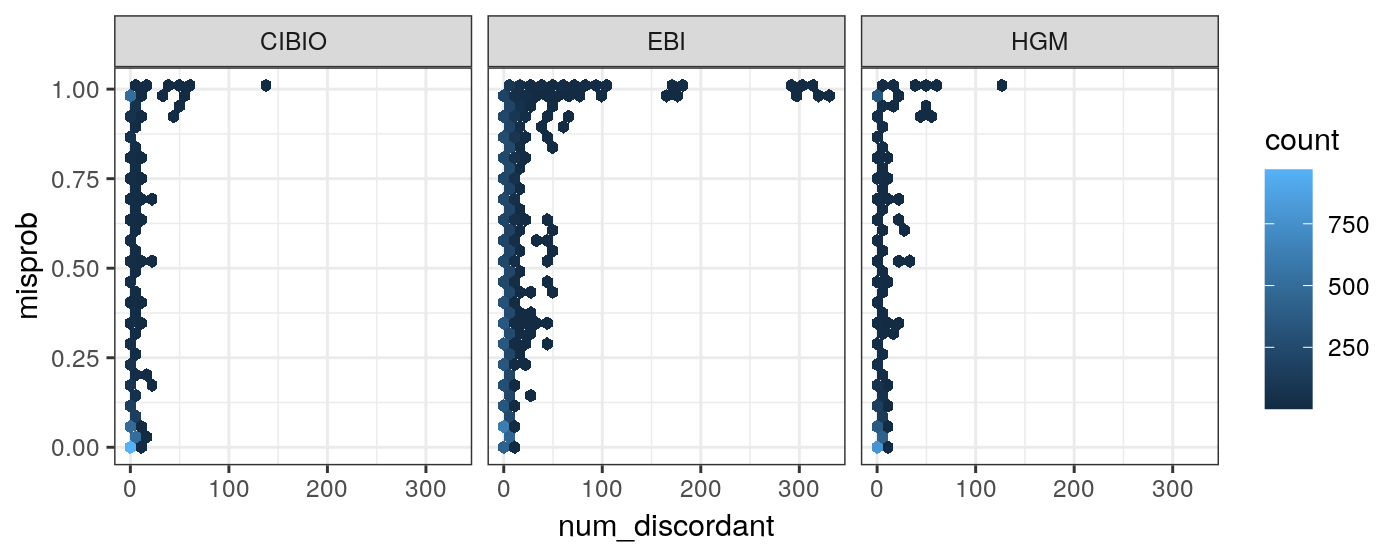

In [119]:
# by discordant
p = model_pred_j %>%
    ggplot(aes(num_discordant, misprob)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7,2.8)
plot(p)

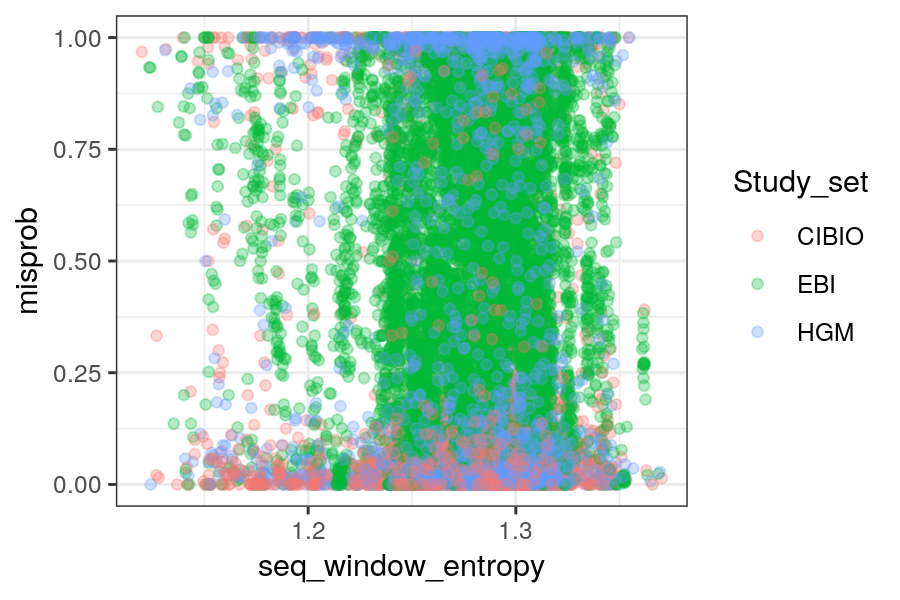

In [45]:
# by seq_window_entropy
p = model_pred_j %>%
    ggplot(aes(seq_window_entropy, misprob, color=Study_set)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(4.5,3)
plot(p)

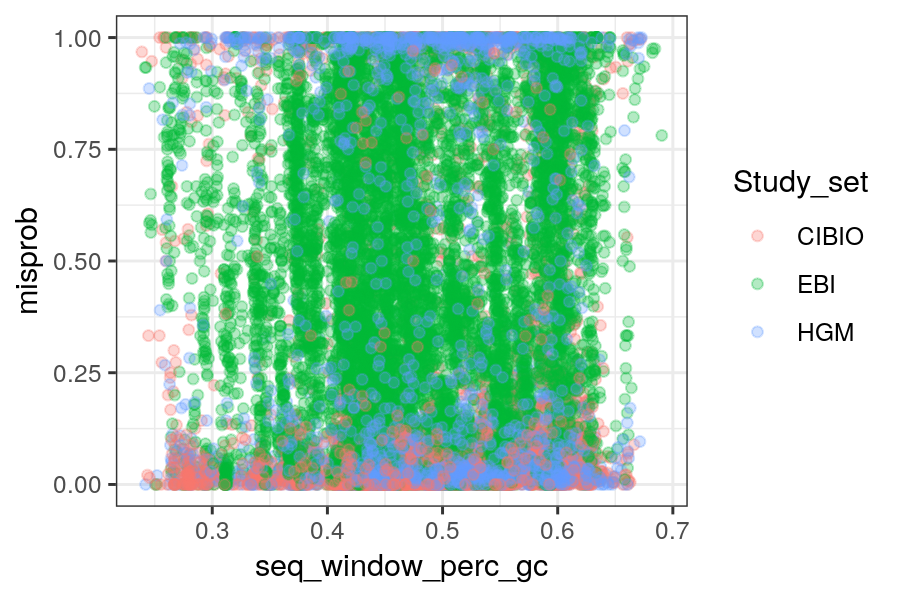

In [46]:
# by seq_window_perc_gc
p = model_pred_j %>%
    ggplot(aes(seq_window_perc_gc, misprob, color=Study_set)) +
    geom_point(alpha=0.3) +
    theme_bw()
p.dims(4.5,3)
plot(p)

### Summarize by contig

In [10]:
# all feature files
D = file.path(work_dir, 'LLMGQC_top100', 'DM-sm', 'map')
files = list_files(D, 'features.tsv.gz')
files %>% length

[1] 16684

In [11]:
# function to load and summarize feature file 
read_feats = function(F){
    feats = Fread(F) %>%
        summarize.(num_SNPs = mean(num_SNPs),
                   num_SNPs_se = sd(num_SNPs) / sqrt(n.()),
                   coverage = mean(coverage),
                   coverage_se = sd(coverage) / sqrt(n.()),
                   num_discordant = mean(num_discordant),
                   num_discordant_se = sd(num_discordant) / sqrt(n.()),
                   seq_window_entropy = mean(seq_window_entropy),
                   seq_window_entropy_se = sd(seq_window_entropy) / sqrt(n.()),
                   seq_window_perc_gc = mean(seq_window_perc_gc),
                   seq_window_perc_gc_se = sd(seq_window_perc_gc) / sqrt(n.()),
                   insert_size_Match = mean(mean_insert_size_Match),
                   insert_size_SNP = mean(mean_insert_size_SNP),
                   .by=c(assembler, contig))
    feats$sample = F %>% dirname %>% basename
    feats$genome = F %>% dirname %>% dirname %>% basename
    return(feats)
}
## test
feats = read_feats(files[1])
feats

assembler contig                         num_SNPs    num_SNPs_se  coverage
1   unknown   GUT_GENOME002207_107_CONTIG107 0.01020842  0.002159089  11.78009
2   unknown   GUT_GENOME002207_3_CONTIG3     0.01641070  0.001182298  12.71463
⋮   ⋮         ⋮                              ⋮           ⋮            ⋮       
108 unknown   GUT_GENOME002207_57_CONTIG57   0.009608811 0.0008377792 13.36912
109 unknown   GUT_GENOME002207_48_CONTIG48   0.011826889 0.0007749487 13.16949
    coverage_se num_discordant num_discordant_se seq_window_entropy
1   0.12731529  0.2079966      0.0145479168      1.196856          
2   0.01420044  0.0153717      0.0005527685      1.242881          
⋮   ⋮           ⋮              ⋮                 ⋮                 
108 0.02973580  0.04003038     0.0027847054      1.251395          
109 0.02511066  0.00292022     0.0002915995      1.249924          
    seq_window_entropy_se seq_window_perc_gc seq_window_perc_gc_se
1   0.008935043           0.4029137          0.0055065915         
2   0.001087964           0.4358262          0.0006905327         
⋮   ⋮                     ⋮                  ⋮                    
108 0.002568214           0.4276111          0.001601724          
109 0.002251128           0.4259943          0.001389509          
    insert_size_Match insert_size_SNP sample    genome          
1   NA                NA              ERS473038 GUT_GENOME002207
2   NA                NA              ERS473038 GUT_GENOME002207
⋮   ⋮                 ⋮               ⋮         ⋮               
108 NA                NA              ERS473038 GUT_GENOME002207
109 NA                NA              ERS473038 GUT_GENOME002207

In [13]:
# summarizing features per contig
doParallel::registerDoParallel(12)
feats = files %>%
    #head(n=12) %>%
    plyr::llply(read_feats, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE)
feats

assembler contig                         num_SNPs   num_SNPs_se
1       unknown   GUT_GENOME002207_107_CONTIG107 0.01020842 0.002159089
2       unknown   GUT_GENOME002207_3_CONTIG3     0.01641070 0.001182298
⋮       ⋮         ⋮                              ⋮          ⋮          
3172874 unknown   GUT_GENOME247448_176_CONTIG176 0.02498564 0.003709931
3172875 unknown   GUT_GENOME247448_121_CONTIG121 0.02982555 0.003388539
        coverage coverage_se num_discordant num_discordant_se
1       11.78009 0.12731529  0.2079966      0.0145479168     
2       12.71463 0.01420044  0.0153717      0.0005527685     
⋮       ⋮        ⋮           ⋮              ⋮                
3172874 5.522114 0.05140804  0.07610569     0.005692946      
3172875 6.081973 0.04203454  0.03357719     0.003155857      
        seq_window_entropy seq_window_entropy_se seq_window_perc_gc
1       1.196856           0.008935043           0.4029137         
2       1.242881           0.001087964           0.4358262         
⋮       ⋮                  ⋮                     ⋮                 
3172874 1.284680           0.006719295           0.6196152         
3172875 1.316989           0.005267066           0.5916338         
        seq_window_perc_gc_se insert_size_Match insert_size_SNP sample    
1       0.0055065915          NA                NA              ERS473038 
2       0.0006905327          NA                NA              ERS473038 
⋮       ⋮                     ⋮                 ⋮               ⋮         
3172874 0.004380228           NA                NA              ERS1066711
3172875 0.003514613           NA                NA              ERS1066711
        genome          
1       GUT_GENOME002207
2       GUT_GENOME002207
⋮       ⋮               
3172874 GUT_GENOME247448
3172875 GUT_GENOME247448

In [14]:
# saving: file
F = file.path(work_dir, 'feats_byContig.RDS')
F

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//feats_byContig.RDS"

In [15]:
# WARNING: saving: writing
saveRDS(feats, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG//feats_byContig.RDS 


In [16]:
# saving: reloading
feats = readRDS(F)
feats

assembler contig                         num_SNPs   num_SNPs_se
1       unknown   GUT_GENOME002207_107_CONTIG107 0.01020842 0.002159089
2       unknown   GUT_GENOME002207_3_CONTIG3     0.01641070 0.001182298
⋮       ⋮         ⋮                              ⋮          ⋮          
3172874 unknown   GUT_GENOME247448_176_CONTIG176 0.02498564 0.003709931
3172875 unknown   GUT_GENOME247448_121_CONTIG121 0.02982555 0.003388539
        coverage coverage_se num_discordant num_discordant_se
1       11.78009 0.12731529  0.2079966      0.0145479168     
2       12.71463 0.01420044  0.0153717      0.0005527685     
⋮       ⋮        ⋮           ⋮              ⋮                
3172874 5.522114 0.05140804  0.07610569     0.005692946      
3172875 6.081973 0.04203454  0.03357719     0.003155857      
        seq_window_entropy seq_window_entropy_se seq_window_perc_gc
1       1.196856           0.008935043           0.4029137         
2       1.242881           0.001087964           0.4358262         
⋮       ⋮                  ⋮                     ⋮                 
3172874 1.284680           0.006719295           0.6196152         
3172875 1.316989           0.005267066           0.5916338         
        seq_window_perc_gc_se insert_size_Match insert_size_SNP sample    
1       0.0055065915          NA                NA              ERS473038 
2       0.0006905327          NA                NA              ERS473038 
⋮       ⋮                     ⋮                 ⋮               ⋮         
3172874 0.004380228           NA                NA              ERS1066711
3172875 0.003514613           NA                NA              ERS1066711
        genome          
1       GUT_GENOME002207
2       GUT_GENOME002207
⋮       ⋮               
3172874 GUT_GENOME247448
3172875 GUT_GENOME247448

In [17]:
send_email('http://127.0.0.1:9704/notebooks/deepmased/notebooks/06_version2/02_real_dataset_eval/01_UHGG/01_genome_select.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [18]:
# insert sizes
summary_x(feats$insert_size_Match)
summary_x(feats$insert_size_SNP)

Min.     1st Qu.  Median   Mean     3rd Qu.  Max.     NA's   
insert_size_Match 75.23318 169.3268 290.1397 270.2222 332.2193 1048.213 2192019
                  sd       sd_err_of_mean
insert_size_Match 828367.7 313093.6

Min. 1st Qu. Median Mean 3rd Qu. Max. NA's    sd sd_err_of_mean
insert_size_SNP NA   NA      NA     NaN  NA      NA   3172875 NA NA

In [19]:
# insert sizes
summary_x(feats$coverage)

Min. 1st Qu.  Median Mean     3rd Qu. Max.     sd     sd_err_of_mean
coverage 0    6.006374 11.203 30.71575 33.0305 2312.699 937.64 382.79

In [122]:
# model per-contig probabilities
F = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_top100/DM-sm/DM/with_mc38_aucPR_0.869-d03-fc1-nblo4_sample.csv.gz'
misprobs = Fread(F, sep=',') %>%
    select.(genome, contig, y_pred_proba)
misprobs

genome           contig                         y_pred_proba
1       GUT_GENOME203706 GUT_GENOME203706_8_CONTIG8     0.6951044   
2       GUT_GENOME203706 GUT_GENOME203706_52_CONTIG52   0.6735171   
⋮       ⋮                ⋮                              ⋮           
3172674 GUT_GENOME201094 GUT_GENOME201094_161_CONTIG161 0.6025003   
3172675 GUT_GENOME201094 GUT_GENOME201094_76_CONTIG76   0.4030285

In [123]:
# checking overlap
overlap(misprobs$genome, feats$genome)
cat('---\n')
overlap(misprobs$contig, feats$contig)
cat('---\n')
overlap(misprobs$genome, uhgg_meta$Genome)

intersect(x,y): 16684 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 16684 
---
intersect(x,y): 3172675 
setdiff(x,y): 0 
setdiff(y,x): 200 
union(x,y): 3172875 
---
intersect(x,y): 16684 
setdiff(x,y): 0 
setdiff(y,x): 270313 
union(x,y): 286997 


In [124]:
# joining
misprobs_j = misprobs %>%
    inner_join.(feats, 
                c('genome'='genome',
                  'contig'='contig')) %>%
    inner_join.(uhgg_meta %>% 
                  select.(Genome, Study_set, Study_accession, Genome_type), 
                c('genome'='Genome'))
misprobs_j

genome           contig                         y_pred_proba assembler
1       GUT_GENOME002207 GUT_GENOME002207_107_CONTIG107 0.1305138    unknown  
2       GUT_GENOME002207 GUT_GENOME002207_3_CONTIG3     0.3722216    unknown  
⋮       ⋮                ⋮                              ⋮            ⋮        
3172674 GUT_GENOME247448 GUT_GENOME247448_176_CONTIG176 0.6849146    unknown  
3172675 GUT_GENOME247448 GUT_GENOME247448_121_CONTIG121 0.6292807    unknown  
        num_SNPs   num_SNPs_se coverage coverage_se num_discordant
1       0.01020842 0.002159089 11.78009 0.12731529  0.2079966     
2       0.01641070 0.001182298 12.71463 0.01420044  0.0153717     
⋮       ⋮          ⋮           ⋮        ⋮           ⋮             
3172674 0.02498564 0.003709931 5.522114 0.05140804  0.07610569    
3172675 0.02982555 0.003388539 6.081973 0.04203454  0.03357719    
        num_discordant_se seq_window_entropy seq_window_entropy_se
1       0.0145479168      1.196856           0.008935043          
2       0.0005527685      1.242881           0.001087964          
⋮       ⋮                 ⋮                  ⋮                    
3172674 0.005692946       1.284680           0.006719295          
3172675 0.003155857       1.316989           0.005267066          
        seq_window_perc_gc seq_window_perc_gc_se sample     Study_set
1       0.4029137          0.0055065915          ERS473038  CIBIO    
2       0.4358262          0.0006905327          ERS473038  CIBIO    
⋮       ⋮                  ⋮                     ⋮          ⋮        
3172674 0.6196152          0.004380228           ERS1066711 CIBIO    
3172675 0.5916338          0.003514613           ERS1066711 CIBIO    
        Study_accession Genome_type
1       ERP005989       MAG        
2       ERP005989       MAG        
⋮       ⋮               ⋮          
3172674 ERP013933       MAG        
3172675 ERP013933       MAG

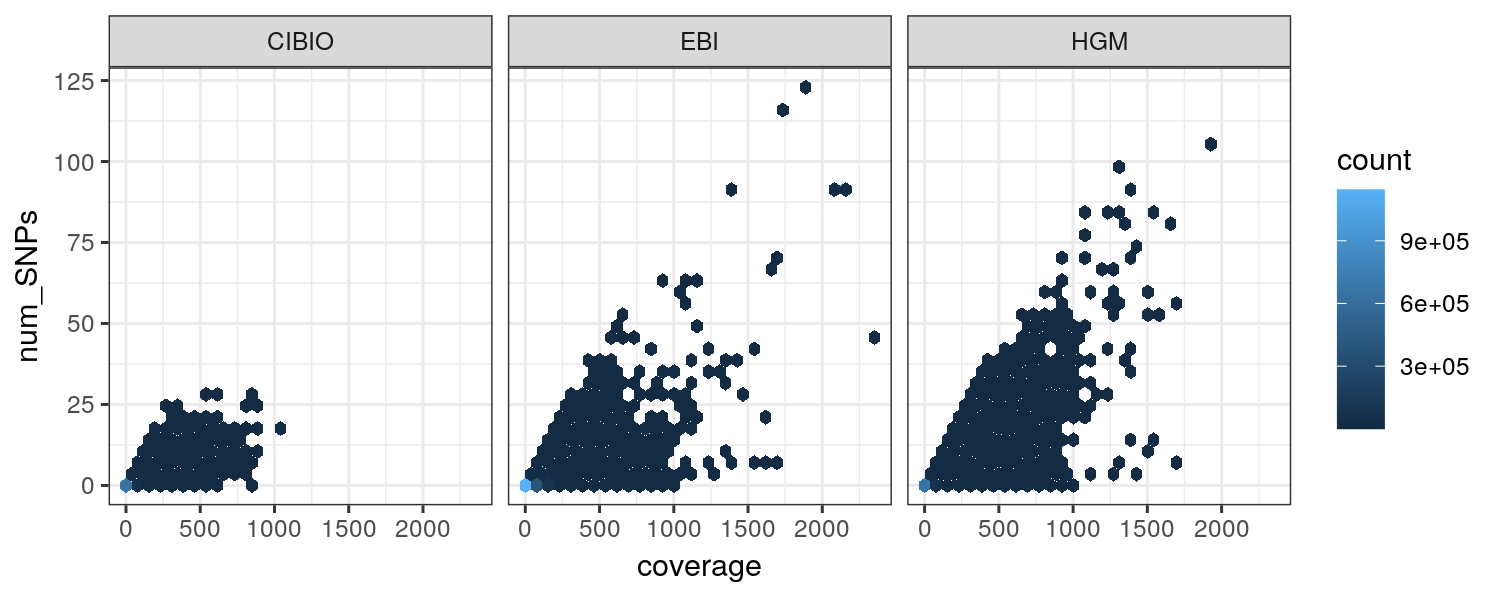

In [129]:
# by numSNPs ~ coverage
p = misprobs_j %>%
    #slice_head.(n=1000000) %>%
    ggplot(aes(coverage, num_SNPs)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7.5,3)
plot(p)

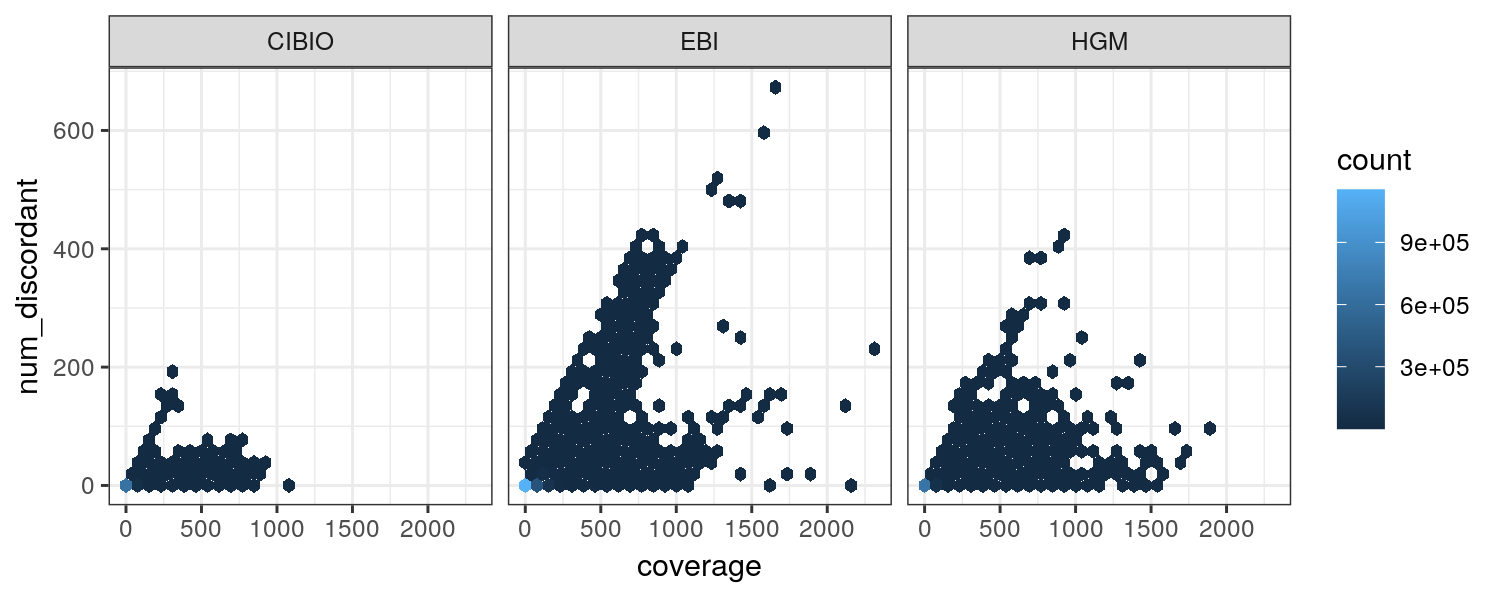

In [130]:
# by discordant ~ coverage
p = misprobs_j %>%
    #slice_head.(n=1000000) %>%
    ggplot(aes(coverage, num_discordant)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7.5,3)
plot(p)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    6.006   11.202   30.712   33.027 2312.699 

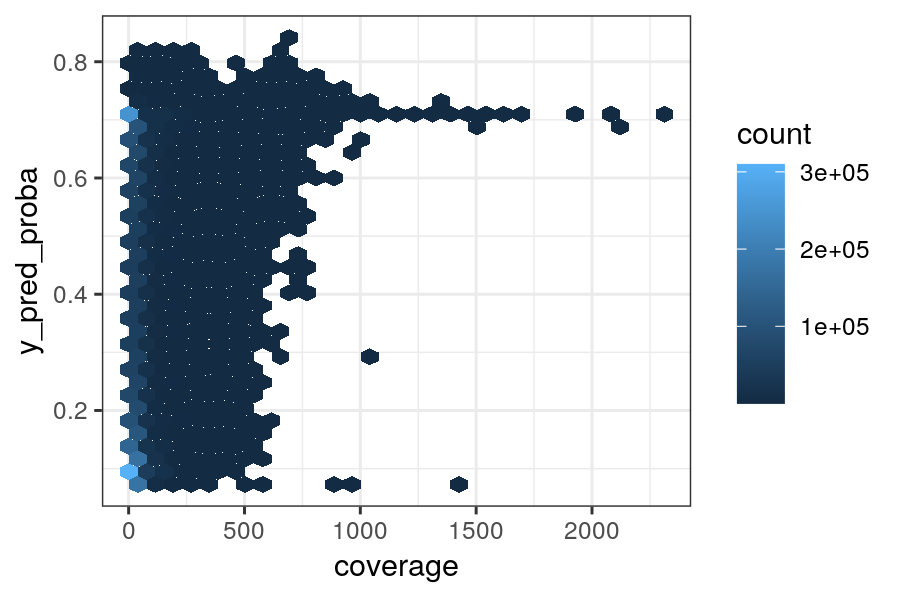

In [126]:
# by coverage
misprobs_j$coverage %>% summary
p = misprobs_j %>%
    #slice_head.(n=1000000) %>%
    ggplot(aes(coverage, y_pred_proba)) +
    geom_hex() +
    theme_bw()
p.dims(4.5,3)
plot(p)

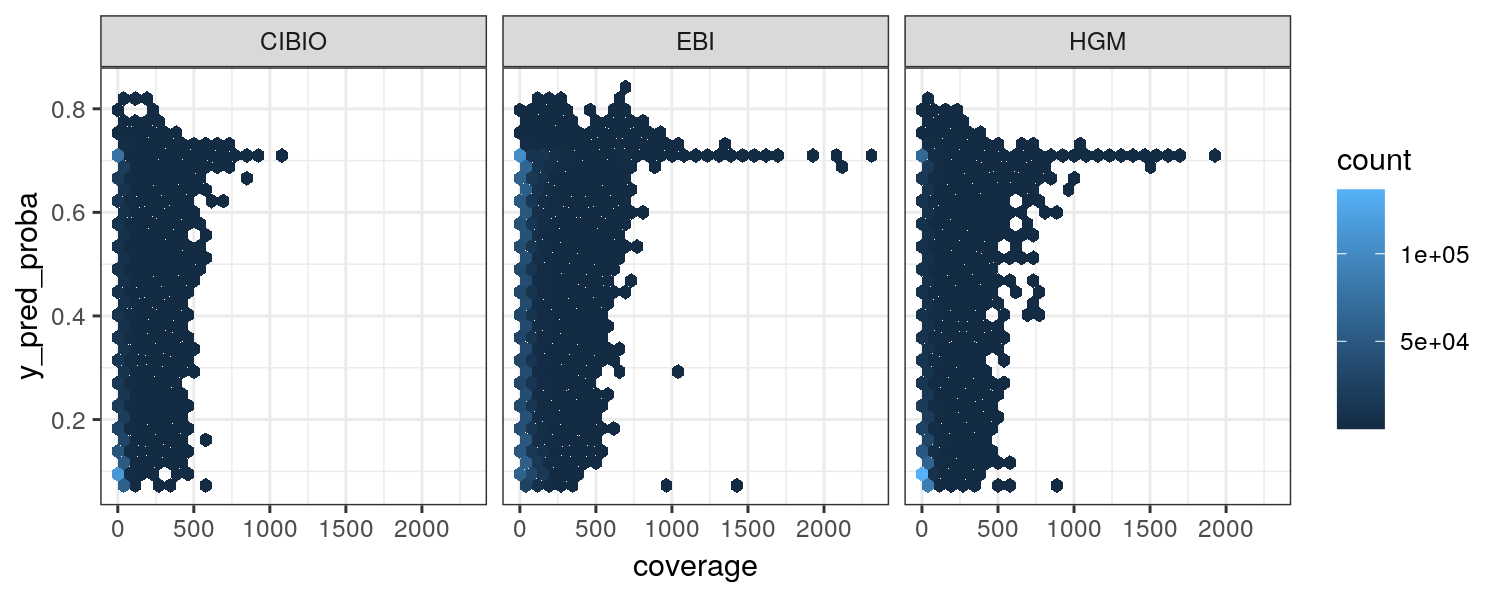

In [99]:
# by coverage & study_set
p = misprobs_j %>%
    #slice_head.(n=10000) %>%
    ggplot(aes(coverage, y_pred_proba)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7.5,3)
plot(p)

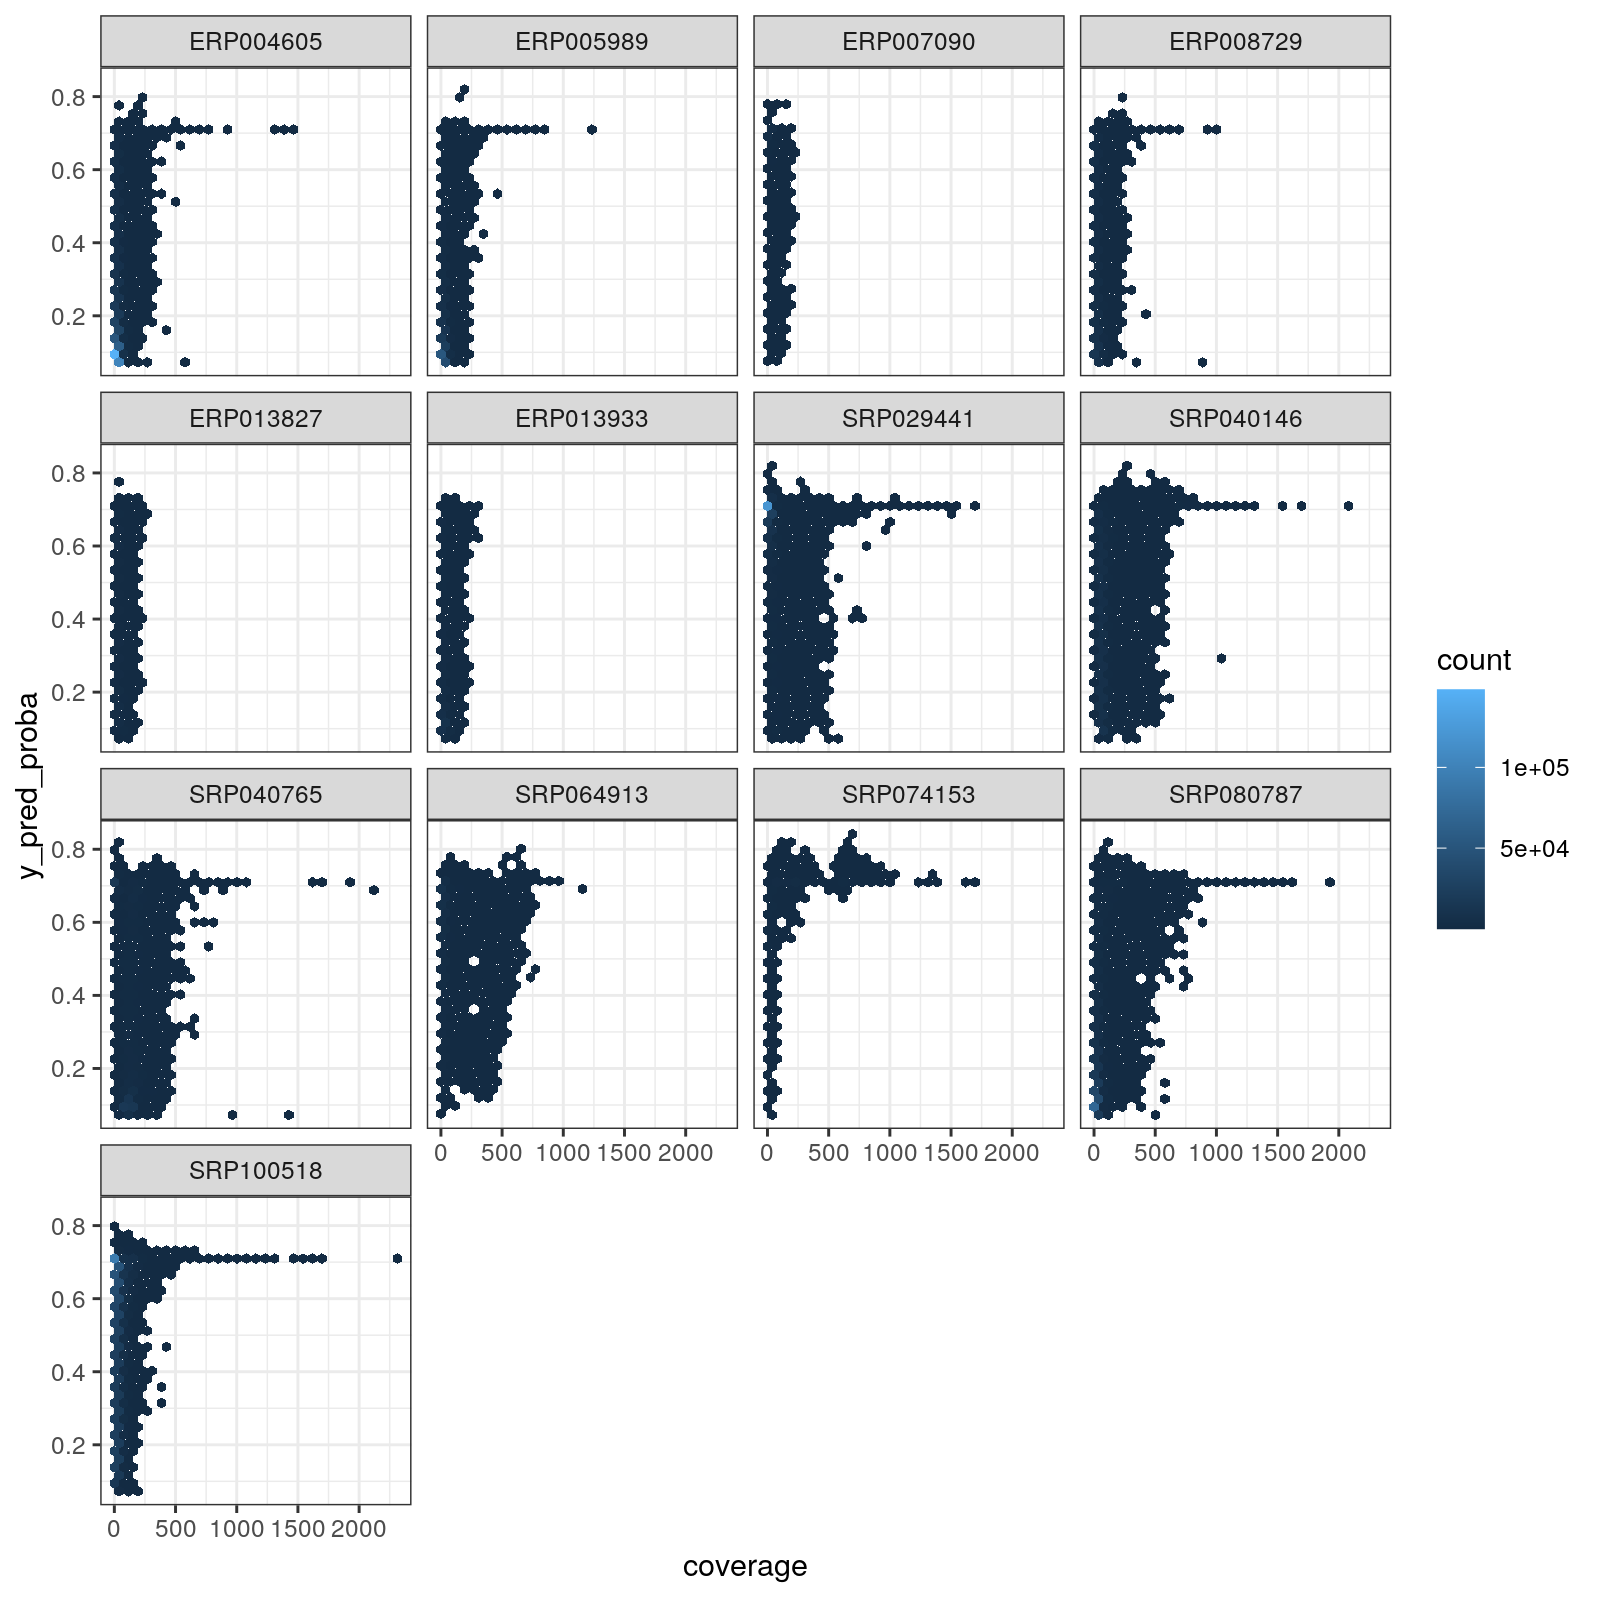

In [127]:
# by coverage & study_set
p = misprobs_j %>%
    ggplot(aes(coverage, y_pred_proba)) +
    geom_hex() +
    facet_wrap(~ Study_accession) +
    theme_bw()
p.dims(8,8)
plot(p)

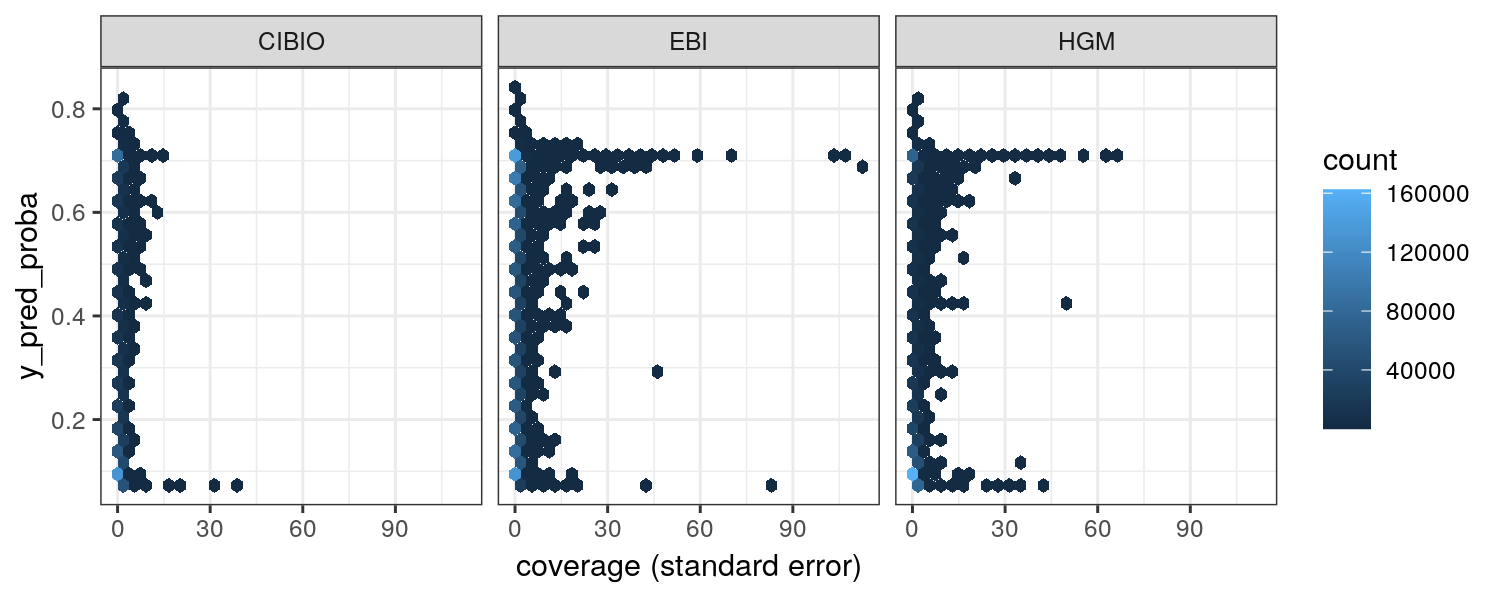

In [100]:
# by coverage & study_set
p = misprobs_j %>%
    #slice_head.(n=100000) %>%
    ggplot(aes(coverage_se, y_pred_proba)) +
    geom_hex() +
    labs(x='coverage (standard error)') +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7.5,3)
plot(p)

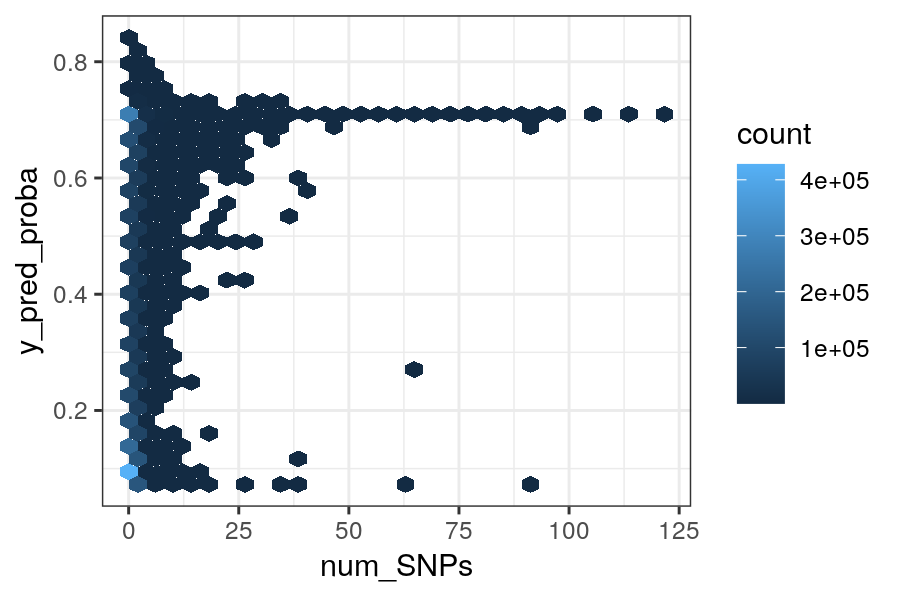

In [102]:
# by SNPs
p = misprobs_j %>%
    #slice_head.(n=100000) %>%
    ggplot(aes(num_SNPs, y_pred_proba)) +
    geom_hex() +
    theme_bw()
p.dims(4.5,3)
plot(p)

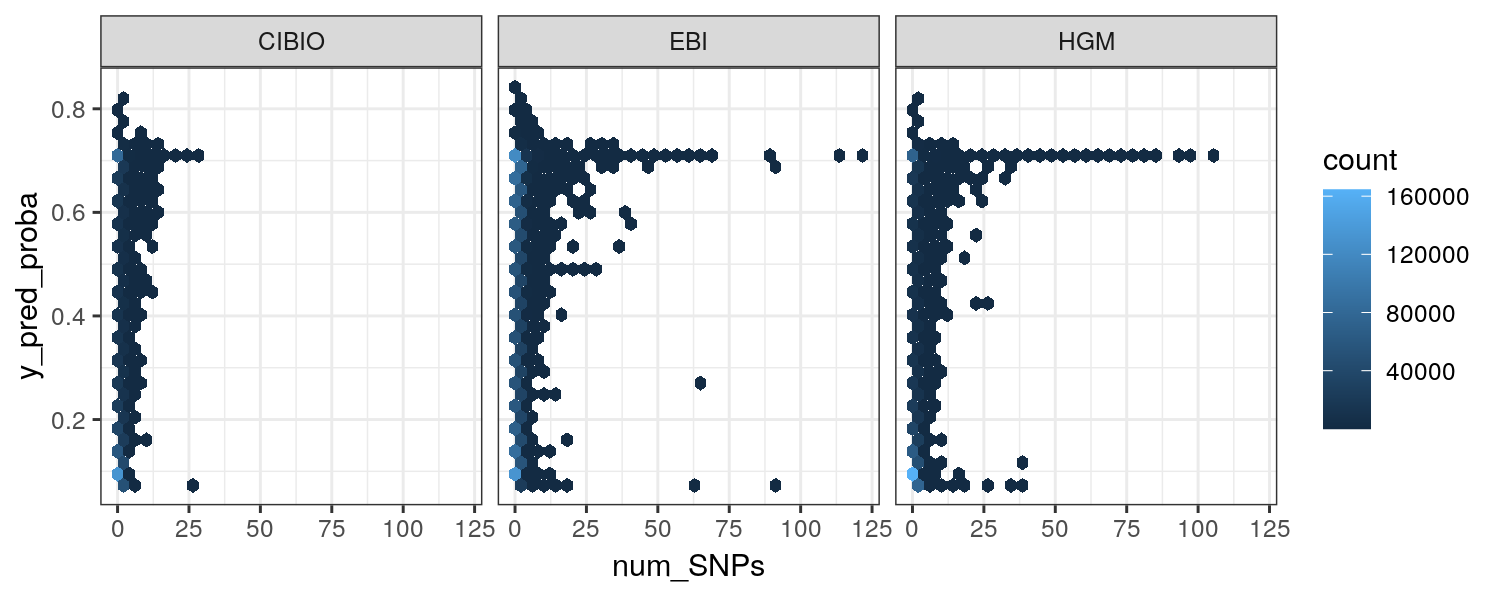

In [103]:
# by SNPs & study_set
p = misprobs_j %>%
    #slice_head.(n=100000) %>%
    ggplot(aes(num_SNPs, y_pred_proba)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7.5,3)
plot(p)

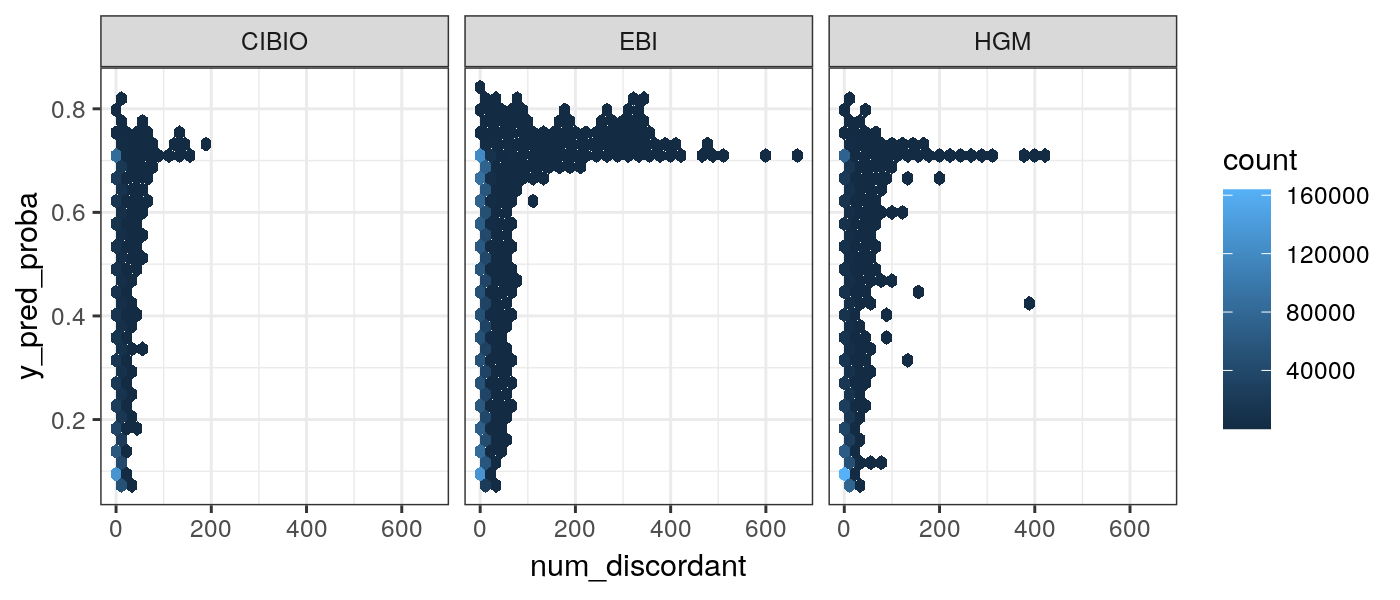

In [104]:
# by num_discord & study_set
p = misprobs_j %>%
    #slice_head.(n=100000) %>%
    ggplot(aes(num_discordant, y_pred_proba)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7,3)
plot(p)

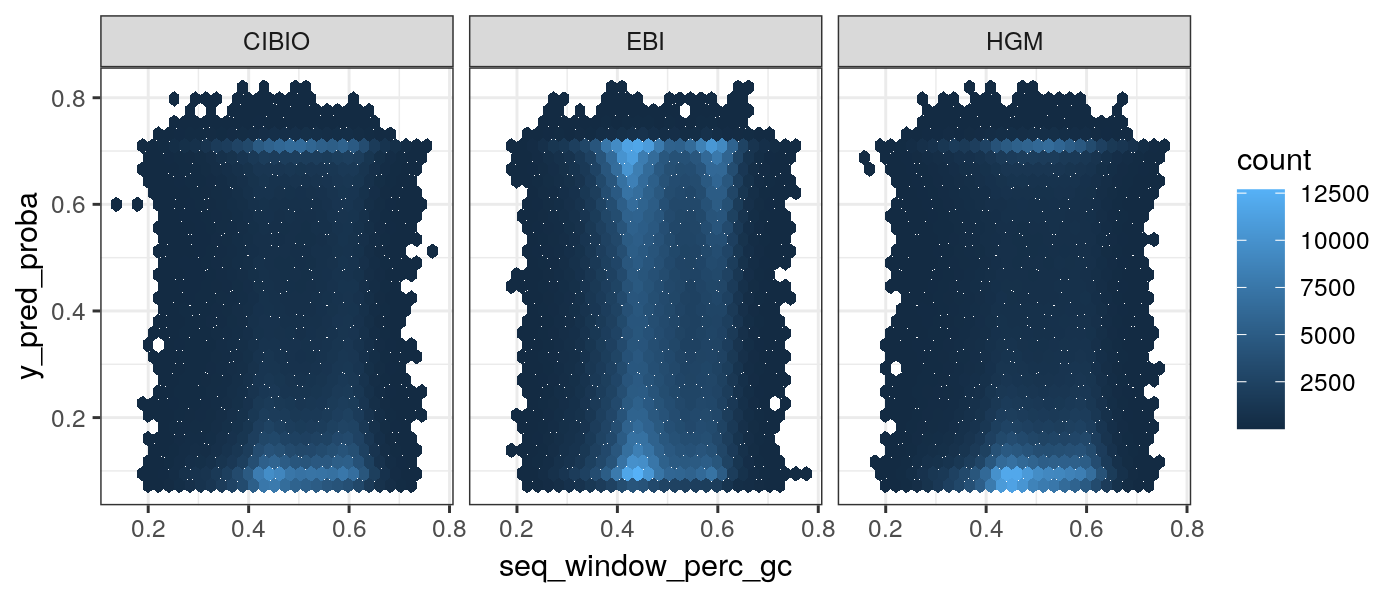

In [105]:
# by seq_window_gc & study_set
p = misprobs_j %>%
    #slice_head.(n=100000) %>%
    ggplot(aes(seq_window_perc_gc, y_pred_proba)) +
    geom_hex() +
    facet_wrap(~ Study_set) +
    theme_bw()
p.dims(7,3)
plot(p)

# sessionInfo

In [68]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/envs/tidyverse2/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.9 tidytable_0.5.8   data.table_1.13.6 ggplot2_3.3.3    
[5] tidyr_1.1.2       dplyr_1.0.3      

loaded via a namespace (and not attached):
 [1] magrittr_2.0.1    munsell_0.5.0     tidyselect_1.1.0  uuid_0.1-4       
 [5] colorspace_2.0-0  R6_2.5.0          